# 01 Unsupervised methods
Main importance is the separation of training and validation data. Need variance in both, and need to be kept separate otherwise no way of telling how well the thing works. Independent validation data is the *only* way to test whether the algorithm works. 
- Training data: used to train the algorithm
- Validation data: Used to see if the algorithm works

**Two broad methods of machine learning**
- *Supervised* method is a method uses a response variable. Or you in some way "tell" the method what it needs to do given some input data. 
    - These are often used for predictions, in the from of running our model to precict some known training data, then assessing its efficiency on test data. Having different training and validation data is important, as algorithms can sometimes overfit data- they train so well with the training data they cannot generalise it to work with other data. 
    - We try to reduce risk of overfitting by adding a lot of variability to our training data. 
- *Unusperivsed* method has no response variable, often a dimensionality reduction technique- not trying to predict anything in particular- but seeks to find ways of describing the *majority* of information using fewer dimensions. 
    - sometimes involves compressing columns into columns of continuous numerical data, sometimes categories. 

## Dimensionality Reduction
When faced with high-dimensional, continuous data, we want to narrow it down to focus only on the most important dimensions (columns) of data. This is not always obvious however, so it is helpful to compress our data into fewer dimensions- finding the fundamental underlying axes of variation that drive the way this data looks (the principle components (PC) of variation in the data set.)
- With these methods there is always loss of information, what is important is making sure you've retained the valuable stuff that you're trying to understand
- Always check with common sense + scientific insight. Do the columns make sense? What do they represent? What are you calculating. The best way to reduce dimensionality is with scientific insight, not statistics
- Furthermore, these approaches assume all axes of data are equally important, so if one of your columns is important to the biological system, there is no guarantee they will be important to the dimensionality reduction approach you're using. 

### Principle component analysis (pca)
Takes many columns of data and rotates them to find their principal axes of variation. It never changes the data (lossless), but highlights how they co-vary. 
- PCA is the exact same as major axis regression. It is "lossless" as it performs no true compression, it only highlights correlations, but if you choose to work with only some of its results axes, then you are explicitly ignoring the variation along the other axes you don't choose. 

**Method:**
Have two axis x and y (where y is not a response variable). In traditional linear modelling, we fit according to least sqaures method which minimised square error of y, or horizontal distance from the line. 
- In PCA we minimise squared error in y and x. This is just the equivilent of of minimising square distance from the line as horizontal product of distance in x and y. 

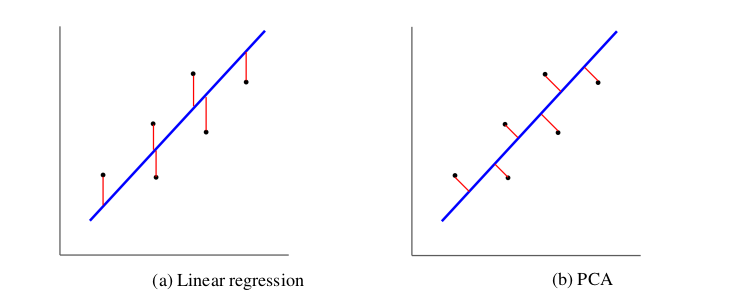

- In the case of 2 dimensional data, this line of best fit becomes our first PCA. Plotted as an axis, PCA 1 then shows how far along each piece of data is on the line of best fit. 
    - PCA 2 is fit orthogonally to PCA 1 at the origin. PCA2 shows how far the data is from the line itself (ie. distance from PCA1 in terms of horizontal space)
    - A PCA is then calculated to try and find a line that minimises the total variance of that second axis, PCA2 (as in traditional linear regression)
- In the case of Multivariate data, this third line would become PCA3 and would be fitted to reduce the overall error of the line (as in step 1). 
    - If our data had more than two dimensions, this third PCA line would become PCA3, orthogonal to PCA1 and PCA2, and would soak up all the remaining variation. 

Gives two important concepts in PCA: all axes are orthogonal, and all variation that was in your dataset is contained in the new PCA axes. We're just "rotating" the data in a fancy way so they match onto the line we've drawn. 
- PCA is finding the line that best explains the variation in all data (not just in one response variable- it doesn't have a response variable)
- Useful as it means taking a big dataset where everything is correlated with everying else, and collapsing that variation into a number of independent (orthogonal) axes. 
    - We can then pick a few axis that explain "enough" of our data and use those. 
    
Since PCA is just roatating the axis of our real data onto new ones, we can also calculate how each PCA axis *loads* onto the original variable axes. 
- "Loading" just means how much variation in a given piece of data is associated with a particular PCA axis. 
- A variable that loads strongly and positively onto PCA 1 is positively correlated with it.
    - *Note* it's not really important if a variable, x, loads negatively or positively onto a PCA. What is of interest is if variable x loads positively onto PCA 1 whereas variable z loads negatively onto it, since this implies the contributions of x and z to the axis are negatively correlated. 

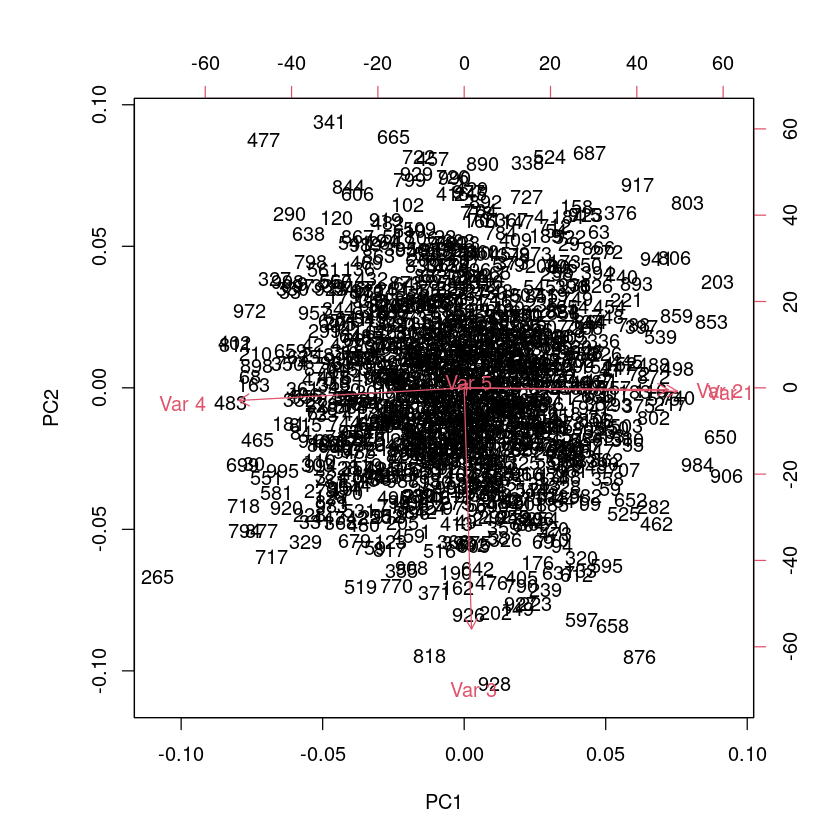

In [3]:
## Example 1: 
library(mvtnorm)
set.seed(123)

# Simulate some data to use- a covariance matrix
# Each row and column refers to one of the variables that are going to be
# randomely drawing from a normal distribution, and each slot represents the
# covariance of the two variables
covariance <- matrix(c(5, 3, 0, -3, 0, 3, 5, 0, -3, 0, 0, 0, 5, 0, 0, -3, -3, 0, 6, 0, 0, 0, 0, 0, 3), nrow=5)
data <- rmvnorm(1000, sigma=covariance)
names(data) <- c("a", "b", "c", "d", "e")

# Run PCA 
pca <- prcomp(data) # runs the pca
biplot(pca) #makes the biplot

Above, each data point is labelled according to its row in our data. 
- The arrows show how each variable (a, b, c, d, e) loads onto each axis 
    - See d is negatively correlated with a and b, and they're both in the same 'plane' (PC1) but on opposite ends. 
    -  c is floating on its own orthogonal to everything else
    - e doesn't load on to anything (sort of in the middle)

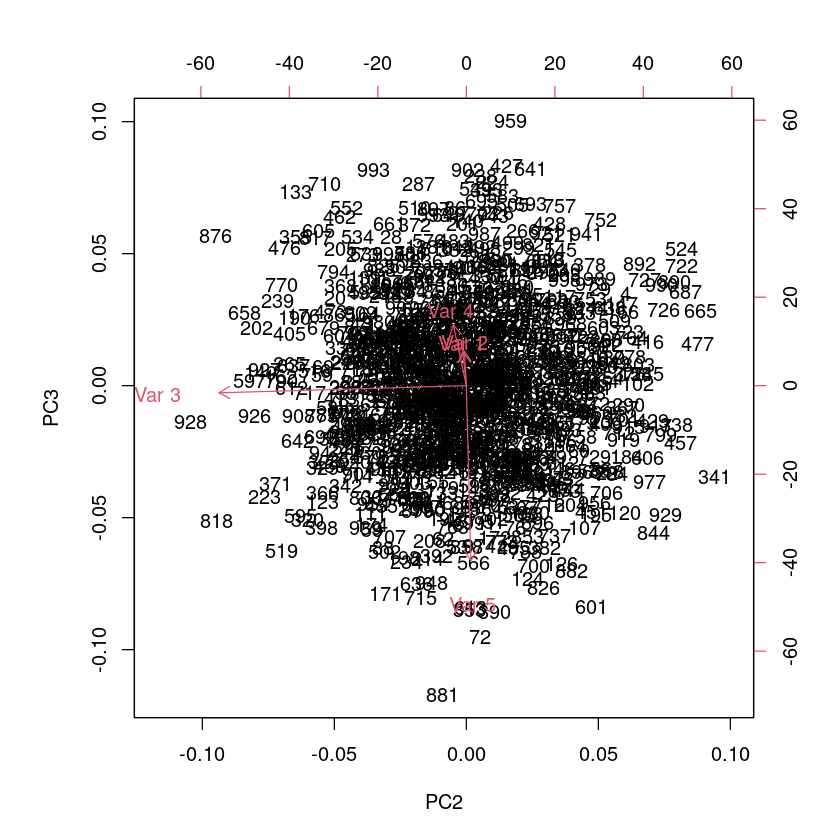

In [4]:
biplot(pca, choices=2:3) # Show PC2 vs. PC3

- Now chosen to see PC3, can see var5(e) loads onto PC3

How can you see these "loadings"? Print out PCA as below. This gives you the "rotation" of the original data, which shows you how strongly each variable loads onto each principle component (CP)

In [5]:
pca

Standard deviations (1, .., p=5):
[1] 3.401595 2.212150 1.712135 1.577754 1.423393

Rotation (n x k) = (5 x 5):
              PC1          PC2         PC3         PC4         PC5
[1,]  0.574036850 -0.014170577  0.17667112  0.63925614  0.48002062
[2,]  0.549149941 -0.007550034  0.17999897  0.06764815 -0.81326591
[3,]  0.019799941 -0.998321195 -0.03729037 -0.03802989  0.01122095
[4,] -0.606999343 -0.052532745  0.31559566  0.66980531 -0.28381744
[5,]  0.008706181  0.018365568 -0.91400027  0.36971596 -0.16583280

So a, b, d all load strongly onto PC1, while c, e are doing the ame on PC2. Infact, c seems very close to PC2 (nearly identical), and we can test this by plotting the two agaisnt each other:

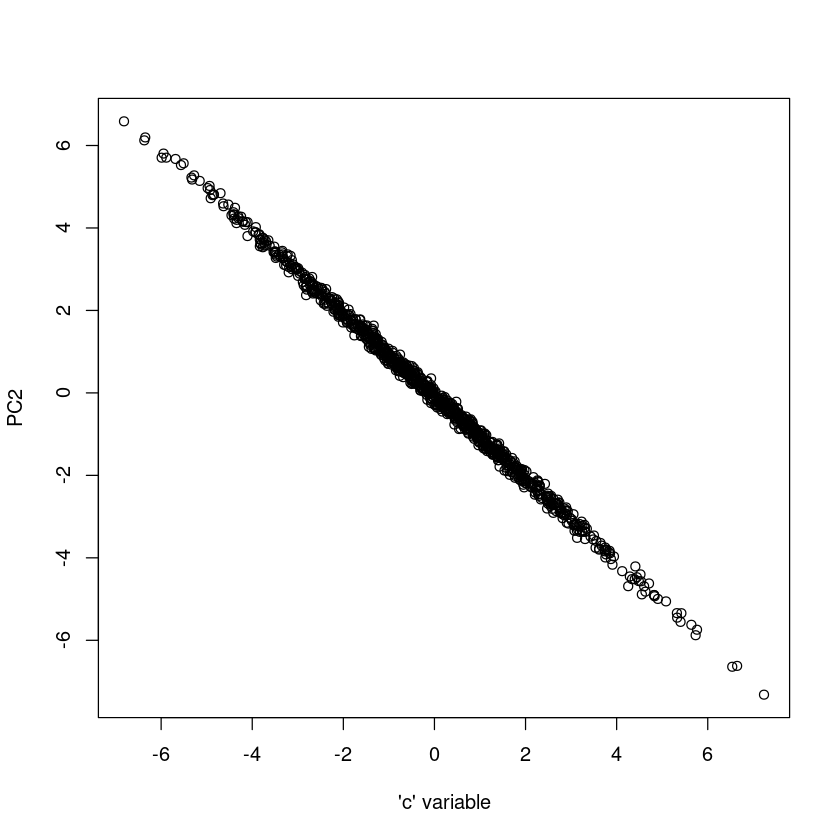

In [6]:
plot(pca$x[,2]~data[,3], xlab="'c' variable", ylab="PC2")

Nearly perfectly negative correlation between the two. 

PCA is a dimension reduction technique- we're trying to take a load of correlated data and reduce it to a smaller set of independent, orthogonal compotents. So critical question is, "how important is each axis"- how many axes are enough fo rme to reduce everything down to? 
- First question easily answered by PCA: an axis is important if it expalins a lot of variance in the orignal data. Can find this by calling summary:

In [7]:
summary(pca) # tells us the proportion of variance they explain, as
# well as how much standard deviation is associated with the axis 

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     3.4016 2.2121 1.7121 1.5778 1.42339
Proportion of Variance 0.4839 0.2047 0.1226 0.1041 0.08473
Cumulative Proportion  0.4839 0.6886 0.8112 0.9153 1.00000

- The larger the SD, the more important an axis is. 
- To find out how much is enough, can plot a scree plot and find where there's an inflection point in the standard deviations. 
    - ie. find the axes that you can join in a single, straight line and work with those axes plus the next one along. 

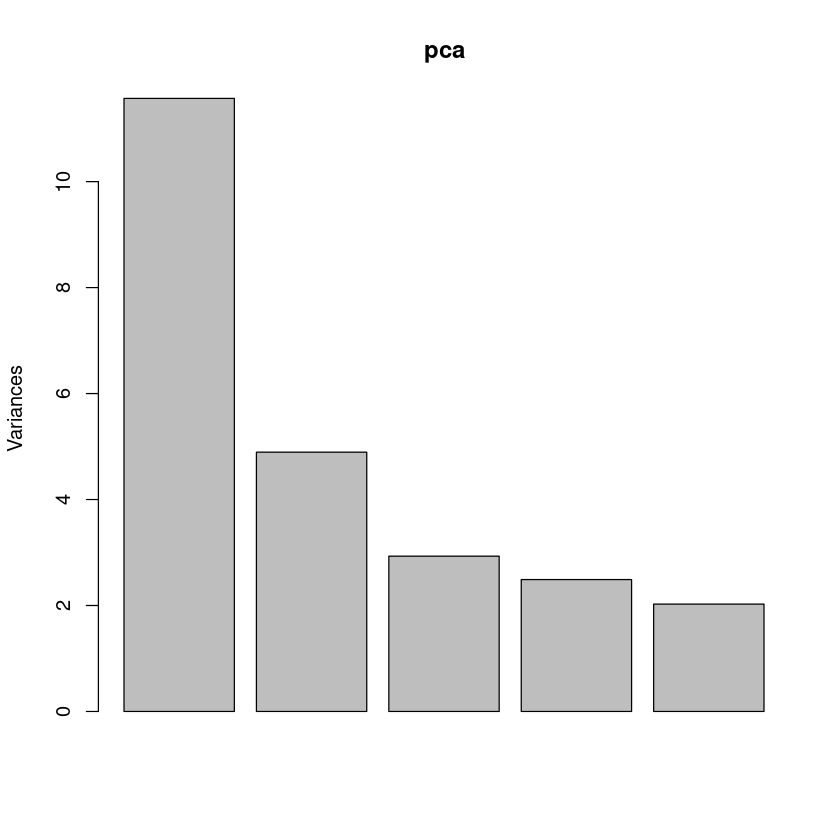

In [8]:
plot(pca) #Scree plot shows importance of PCA's

Can see above, PC1 and 2 are on a straight line, whereas PCA3 isnt. So we could choose PCA1,2,3. 

When picking axis, remember that just because an axis doesn't have a lot of variance associated with it, doesn't mean it's not important. The amount of variance is related to all the variables you put into your systems, PCA wouldn't be able to help you find the one that matters to your biological system. 
- Assumption of PCA is that each variable could be as important as the other.
- Never mistake the opaque for the profound. If you don't know what an axis represents biologically, it's essentially useless to you. 
- Another important thing to note is that PCAs are quite sensitive to variance amoung the different axes (variables). Thus if one variable has greater variance within it, this variance will "inflate" its importance. 
    - If everything is meant to have equal importance, they should also vary equally. 
    - A simple solution to this would be to conduct your PCA on z-transformed variables (scaled to have an sd of 1). So *extremely* important to *always scale your variables*!

In [9]:
pca <- prcomp(data, scale=TRUE) #scaled data

### Principle co-ordinate analysis (PCoA)
Strangley different to PCA- so important to distinguish between them. 
- Use for exact same reason as PCA, but not for continuous or mixed data.
- PCoA works on a *distance* matrix of data, and works by projecting the distance matrix onto a Euclidean space of as many dimensions as yous specify. 
    - Where Euclidean space is just distance amoung objects as it would be in real life. 
**Distance Matrix**
Say we have several random points. A distance matrix is the distance between all those points, where the diagonal line is always zero since points have zero distance with themselves. 

         1        2
2 2.236068         
3 2.000000 2.236068

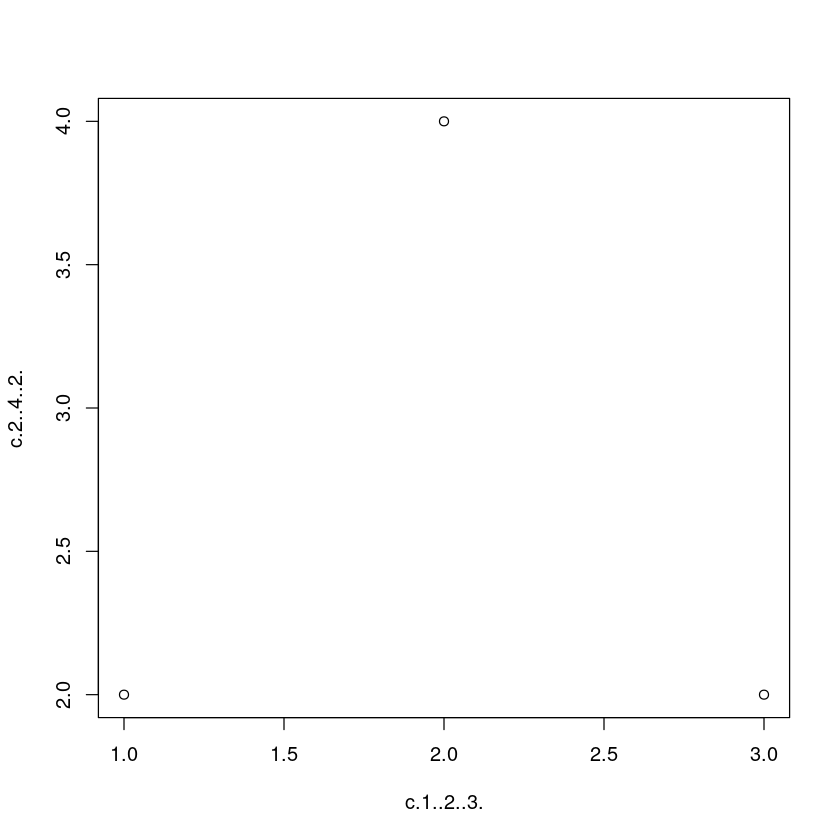

In [10]:
points <- data.frame(c(1, 2, 3), c(2, 4, 2))
plot(points)
dist(points)

PCoA takes a distance matrix and finds a way of arranging the points as represented in the distance matrix so they can be plotted. This can take any number of dimensions. 

**METHOD**
1. Center the distance matrix: take the mean of each point, which is sum(column)/sum(row), then subtract it from each point in columnn. 
    - This centers the axis around the origin (0,0), which is just convenient. 
2. Find the eigein vectors and values of the centered matrix
    - Eigein vectors = gives us the PCA axes(direction along each of our principle coordinate vectors are pointing)
    - Eigein values give us PCA variances (the variances associated with these axes). 
    - PCoA on a correlation matrix is the *same* as doing a pca of scaled data. (quite a useful property to be aware of)
3. Rescale (divide) by the square root of the eigein value  (for each eigen vector)
    - This is important because anything with a negative eigenvalue cannot be represented in Euclidean space, and anything with an eigenvalue of zero doesn't matter. So this step simply figures out what matters. 
4. Finished! Each row of the resulting matrix is now a data-point, and each column is the position in space where it should be plotted. 

Here the Eigenvectors are the regression equations through our data that are orthogonal to one another (essentially what we were calculating in PCA)
- The Eigenvalues show how much variation in our original data is associated with each of these equations, and are identical to the standard deviation we worked with in PCA above. 
- When any eigenvalue becomes zero in this process, shows that that axes is entirely unimportant to us- helps narrow down which axis are significant- all of them with a value greater than zero. 

THe catch is, PCoA is *not* lossless- you are reprojecting data into a euclideon space, and lose any data points with a negative eigenvalue. The negative Eigein values represent how much data is lost in this projection. 
- Which means you can't bring any of that data into the euclidean space- it will be lost. So lose any variance that can't be projected into euclidean space. 
- If loss of information is a worry, can use something called non-metric multidimensional scaling instead. 

#### Non-Metric multidimensional scale analysis
(NMDS or MDS) Will not throw away any variantion in data, but have to pick how any axes you are going to estimate at the beginning. And variance along any other axes is lost.
- Introduces a "stress"/"strain" term (not formally the same thing, but going to use them interchangeably)
    - Strains each point until they are made equal, where strain/stress is the quantity of crinkling/straining needed to make them all fit
    - Can map all onto euclidean space, but with slightly warped distances beteen various points. Where stress and strain is literally the magnitude of wripping and crinkling of space to make values fit onto it (ex: the ripping of paper in lecture). 
    - Replaces precise distances in our distance matrix with "ranks" based on closeness between points. 
    - Tries to find an orientation in space that minimises the distance between points. Does this using any algorithm (ex: random walk most common in bayes). 
    
Stress/Strain is the deformation (paper tearing) that is works on the ranks.
- PCoA promises to map all data that can be mapped into Euclidean space
- NMDS promises to get *all* information, but only for a given number of dimensions. 
    - That's why always need to ask how much variation is explained in the NMDs. Often people use this and the axes represent less than 2% of data on axis, and this is crap. 

*Example*: Let's simulate compositions of species across two environmental gradients. 
- In this example, going to simulate intercepts and slopes of species's responses to two environmental gradients, as well as their abundances across those gradients. (Notes this is the most complex set of data we will simulate, so forgettaaboutit)

In [11]:
# Firstly, lets draw the species parameters
intercepts <- rnorm(20, mean=20)
env1 <- rnorm(20)
env2 <- rnorm(20)

# Create an environment 
env <- expand.grid(env1=seq(-3, 3, .5), en2=seq(-3,3,.5))
biomass <- matrix(ncol=20, nrow=nrow(env))
for (i in seq_len(nrow(biomass))) {
    biomass[i,] <- intercepts+env1*env[i, 1]+env2*env[i,2]
}
head(biomass) # got a lot of continuous data to work with now :) 

[,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
[1,] 18.20927 21.60149 20.99524 23.12958 23.84521 22.65451 16.04790 26.86815
[2,] 17.76777 21.31109 20.69736 22.56681 23.75135 22.13548 16.71913 26.92991
[3,] 17.32628 21.02069 20.39948 22.00405 23.65748 21.61646 17.39036 26.99166
[4,] 16.88478 20.73028 20.10161 21.44129 23.56362 21.09744 18.06159 27.05342
[5,] 16.44328 20.43988 19.80373 20.87853 23.46976 20.57842 18.73282 27.11518
[6,] 16.00178 20.14948 19.50585 20.31576 23.37590 20.05940 19.40405 27.17693
     [,9]     [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]   
[1,] 11.28860 27.86744 27.31717 19.60297 19.98292 19.86249 21.54229 25.76079
[2,] 11.71768 27.16473 27.30994 19.87576 20.03197 19.87129 21.02515 25.44643
[3,] 12.14675 26.46201 27.30271 20.14855 20.08103 19.88009 20.50801 25.13207
[4,] 12.57583 25.75930 27.29548 20.42134 20.13009 19.88889 19.99087 24.81771
[5,] 13.00490 25.05659 27.28825 20.69412 20.17914 19.89769 19.47373 24.50335
[6,] 13.43397 24.35387 27.28103 20.96691 20.22820 19.90648 18.95659 24.18900
     [,17]    [,18]    [,19]    [,20]   
[1,] 18.43066 17.41344 22.26355 12.40756
[2,] 18.22821 17.01225 22.64545 13.28736
[3,] 18.02576 16.61107 23.02736 14.16717
[4,] 17.82331 16.20988 23.40926 15.04698
[5,] 17.62086 15.80870 23.79116 15.92678
[6,] 17.41841 15.40751 24.17307 16.80659

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



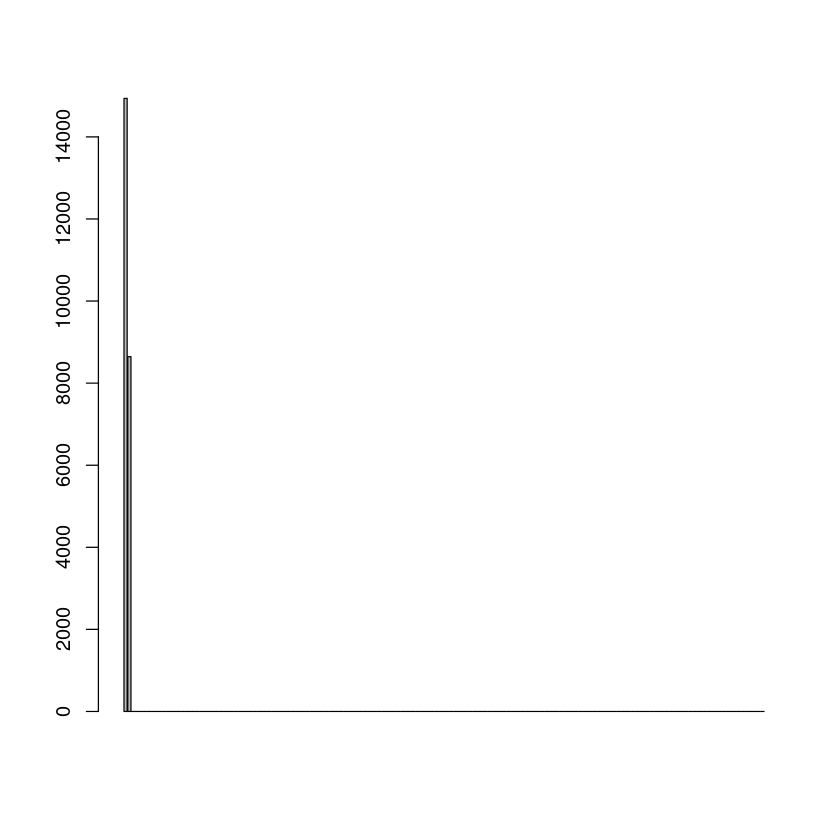

In [12]:
# Summarise data using PCoA
library(vegan)
dist <- dist(biomass) # creates distance matrix
pcoa <- cmdscale(dist, eig=TRUE) # runs PCoA, asking it to return eigenvector info 
# pcoa returns a matrix of points and eigen values

# plot the eigenvalues of each axis (how much variation they explain in space)
barplot(pcoa$eig) # first two axis explain overwhelming majority, so we can work with just those

*NOTE*- The scree test used in PCA does not apply here- based around expecatations of eigenvalues under various null models for PCA, not PCoAs

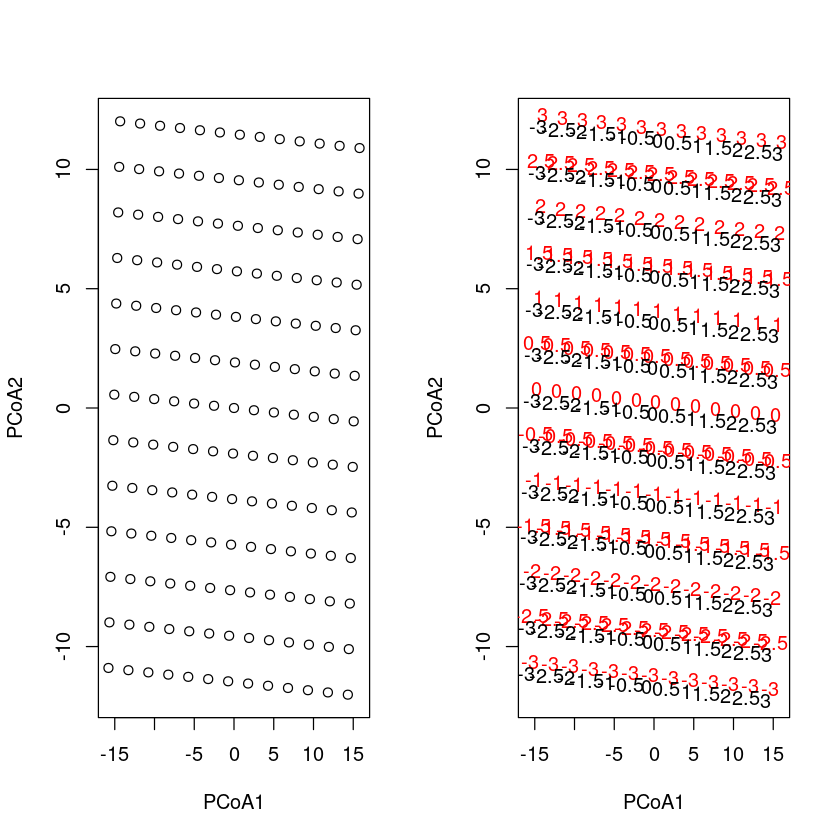

In [13]:
# Plot various axes(points) of the PCoA
par(mfrow=c(1,2))
#1. plot each site's position in 2D space we mapped our distance matrix onto
plot(pcoa$points[,1:2], xlab="PCoA1", ylab="PCoA2")

# plot the values of each site in the first and second environmental axes
plot(pcoa$points[,1:2], type="n", xlab="PCoA1", ylab="PCoA2")
text(pcoa$points[,1:2]+.25, labels=env[,1], col = "red")
text(pcoa$points[,1:2]-.25, labels=env[,2], col = "black")

Main take away here: we simulated data that varied across two axes, and the result of our PCoA found two axes across which it can distribute the data. 

#### Example: (N)MDS
Don't need an analytical solution for how to find the Euclidean space onto whicha  given distance matrix should be mapped. INstead, can keep moving points around until you find an arrangement where the dstance between points is sufficiently close to the distance in the real data. 
- When scaled in a few different ways, that distance is called *stress* or *strain* depending on the method you use. 

Run 0 stress 1.242402e-16 
Run 1 stress 3.641244e-05 
... Procrustes: rmse 2.710691e-05  max resid 7.139872e-05 
... Similar to previous best
Run 2 stress 8.417549e-05 
... Procrustes: rmse 3.055831e-05  max resid 0.0002167998 
... Similar to previous best
Run 3 stress 9.234905e-05 
... Procrustes: rmse 4.645507e-05  max resid 0.0002139585 
... Similar to previous best
Run 4 stress 6.740245e-05 
... Procrustes: rmse 3.446793e-05  max resid 0.0001473868 
... Similar to previous best
Run 5 stress 5.119249e-05 
... Procrustes: rmse 3.098223e-05  max resid 0.0001082465 
... Similar to previous best
Run 6 stress 7.36929e-05 
... Procrustes: rmse 4.783841e-05  max resid 0.0001722293 
... Similar to previous best
Run 7 stress 6.053695e-05 
... Procrustes: rmse 4.451297e-05  max resid 0.0001591233 
... Similar to previous best
Run 8 stress 7.950937e-05 
... Procrustes: rmse 5.056294e-05  max resid 0.0001607971 
... Similar to previous best
Run 9 stress 7.856067e-05 
... Procrustes: rmse 4.3243

Warning message in metaMDS(dist):
“stress is (nearly) zero: you may have insufficient data”
species scores not available



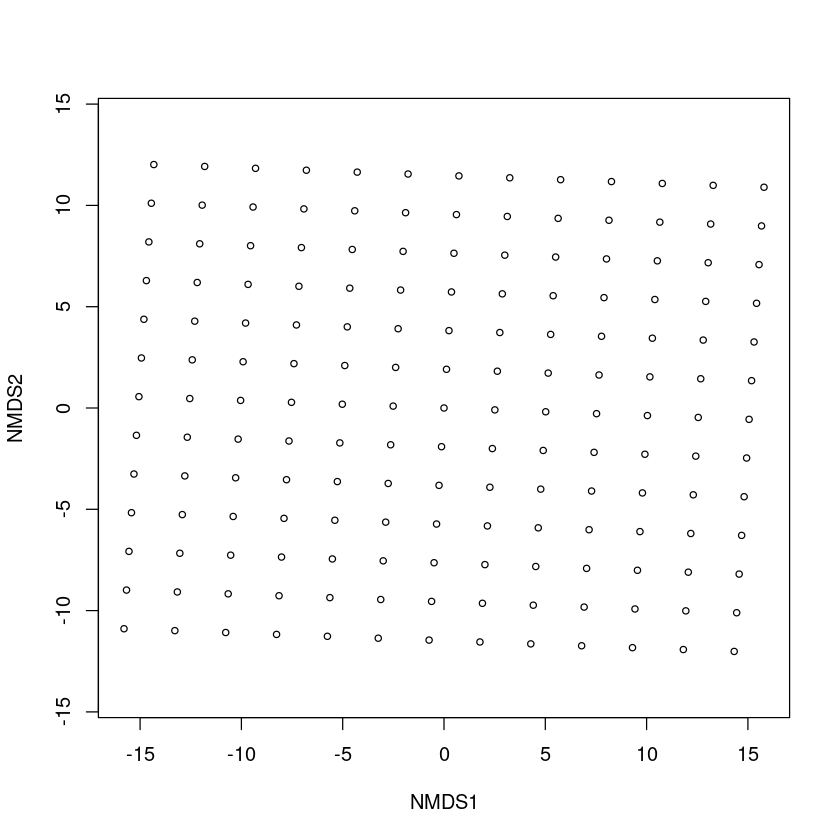

In [14]:
nmds <- metaMDS(dist)
plot(nmds)

Answer is essentially the same as before. Note the stress here is very low, since the data we simulated was well behaved. 

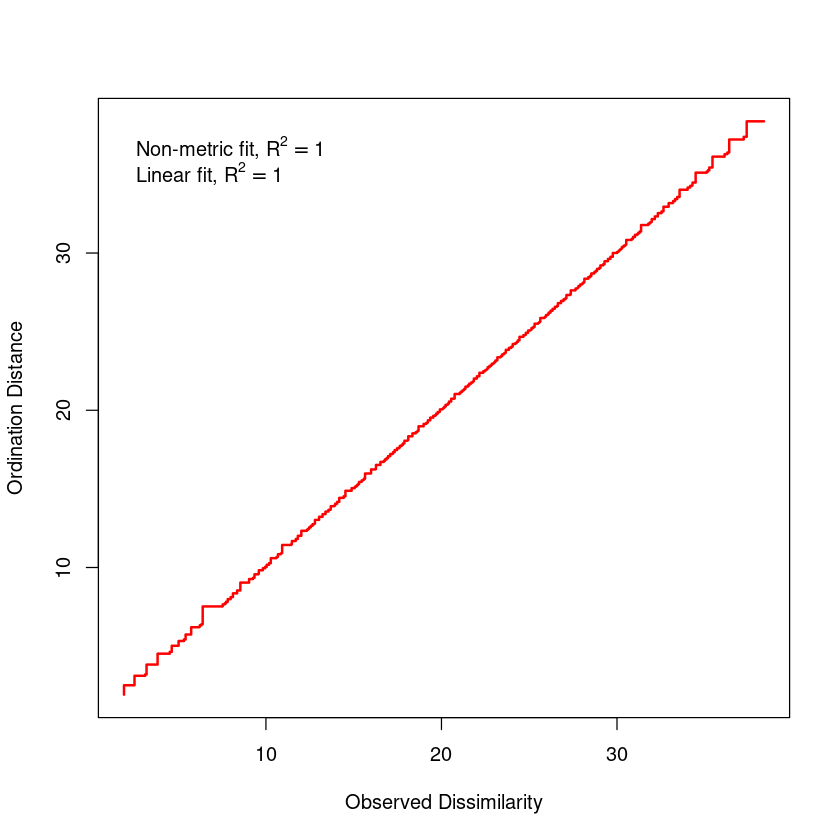

In [15]:
stressplot(nmds) # Shepard disgram- diagnose how well model has fit
# Want a 1:1 line here

species scores not available

Warning message in newton(lsp = lsp, X = G$X, y = G$y, Eb = G$Eb, UrS = G$UrS, L = G$L, :
“Fitting terminated with step failure - check results carefully”


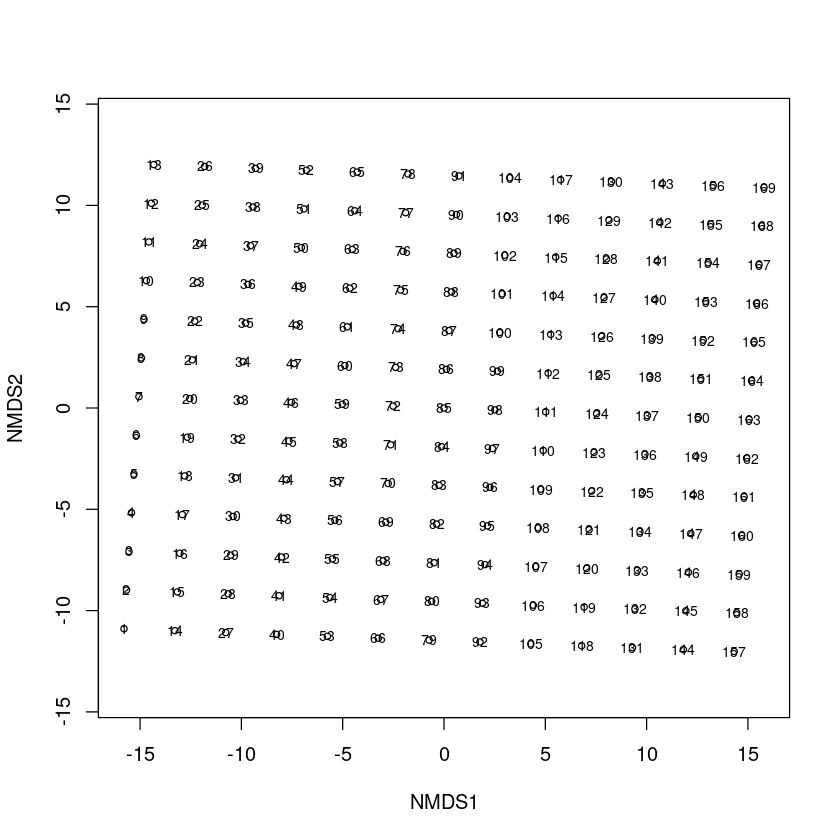


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, x2, k = 10, bs = "tp", fx = FALSE)

Estimated degrees of freedom:
8.42  total = 9.42 

REML score: -5396.16     

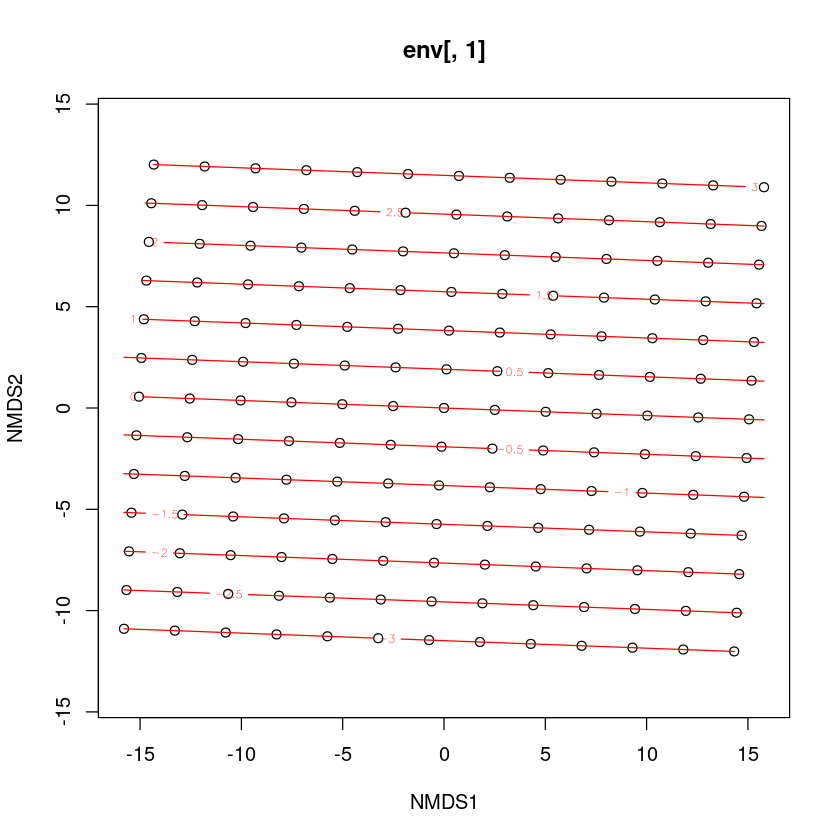

In [16]:
# Plot
plot(nmds)
orditorp(nmds, display="sites")
ordisurf(nmds, env[,1])

*Notes* Does not like mapping environmental responses onto these kinds of plots. SHould be tremendously careful about fitting smoothed regression to transformed-distance, because there are so many steps and so many ways for error to creep in. 

### Coda: Quantile regression
NMDS and PCoAs are a fantastic way to summarise data, but since they lose information in the process, author believes they are not good foundations for analysis. Prefers to work with the original distance matrix itself when performing statistical analysis, using a *Mantel Test*
- Equivilent to a correlation coefficient  for distance matrixes. 

In [17]:
# Run matel test on a single variable
mantel(dist, dist(env[,1]))
# Run mantel on  a distance matrix of all enviro data in one
mantel(dist, dist(env))


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = dist, ydis = dist(env[, 1])) 

Mantel statistic r: 0.5224 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0238 0.0317 0.0368 0.0420 
Permutation: free
Number of permutations: 999



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = dist, ydis = dist(env)) 

Mantel statistic r: 0.9774 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0229 0.0318 0.0372 0.0475 
Permutation: free
Number of permutations: 999


If you have more than one variable, and want to know the influence of each variable you can use *quantile regression*
- Just like standard regression, but it works with quantiles of your data

In [18]:
library(quantreg)
data <- data.frame(dist=as.numeric(dist), 
                   env1=as.numeric(dist(env[,1])), 
                                   env2=as.numeric(dist(env[,2])))
head(data)
model <- rq(dist~env1+env2, data=data)
summary(model)

Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




dist      env1 env2
1  1.913166 0.5  0   
2  3.826333 1.0  0   
3  5.739499 1.5  0   
4  7.652666 2.0  0   
5  9.565832 2.5  0   
6 11.478999 3.0  0


Call: rq(formula = dist ~ env1 + env2, data = data)

tau: [1] 0.5

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)   0.72399   0.03689   19.62635   0.00000
env1          2.40150   0.01017  236.02986   0.00000
env2          3.98079   0.01070  371.97971   0.00000

### Dimensionality Exercises
**1)** Download global temperature and precipitation data and carry out the following exercises.

In [19]:
require(raster)
r <- getData("worldclim", var="bio", res=10)
e <- extent(150, 170, -60, -40)
data <- data.frame(na.omit(extract(r,e)))
names(data) <- c("temp.mean","temp.diurnal.range", "isothermality",
"temp.season","max.temp","min.temp","temp.ann.range","temp.wettest",
"temp.driest","temp.mean.warmest","temp.mean.coldest","precip",
"precip.wettest.month","precip.driest","precip.season",
"precip.wettest.quarter","precip.driest.quarter",
"precip.warmest","precip.coldest")
head(data)

Loading required package: raster

Loading required package: sp



temp.mean temp.diurnal.range isothermality temp.season max.temp min.temp
1 121        96                46            3784        226       18     
2 116        96                45            3818        222       13     
3 113        98                45            3942        223        9     
4 116        97                45            3904        224       12     
5 104        98                45            3976        216        1     
6  81       100                45            4134        199      -22     
  temp.ann.range temp.wettest temp.driest temp.mean.warmest temp.mean.coldest
1 208            138          69          167               69               
2 209            133          64          163               64               
3 214            111          59          161               59               
4 212            134          62          163               62               
5 215            123          50          153               50               
6 221            100          25          132               25               
  precip precip.wettest.month precip.driest precip.season
1 4488   472                  287           15           
2 4354   448                  284           15           
3 5374   579                  360           15           
4 4730   507                  305           15           
5 4385   453                  290           15           
6 4201   416                  255           14           
  precip.wettest.quarter precip.driest.quarter precip.warmest precip.coldest
1 1263                    903                  1168            903          
2 1228                    890                  1117            890          
3 1491                   1129                  1323           1129          
4 1319                    961                  1213            961          
5 1228                    905                  1111            905          
6 1176                    899                  1031            899

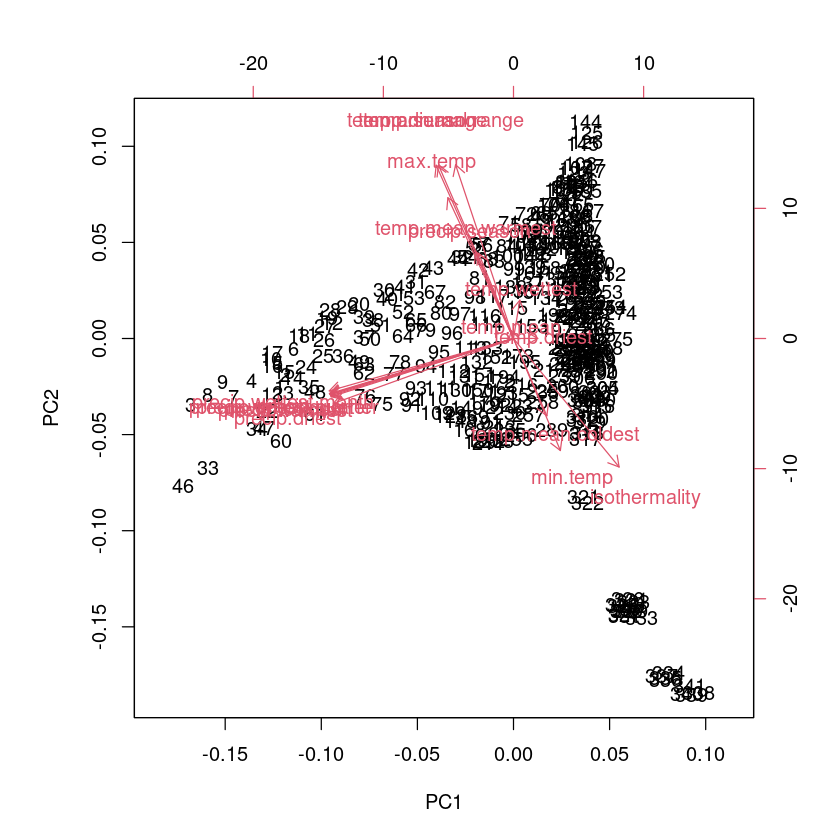

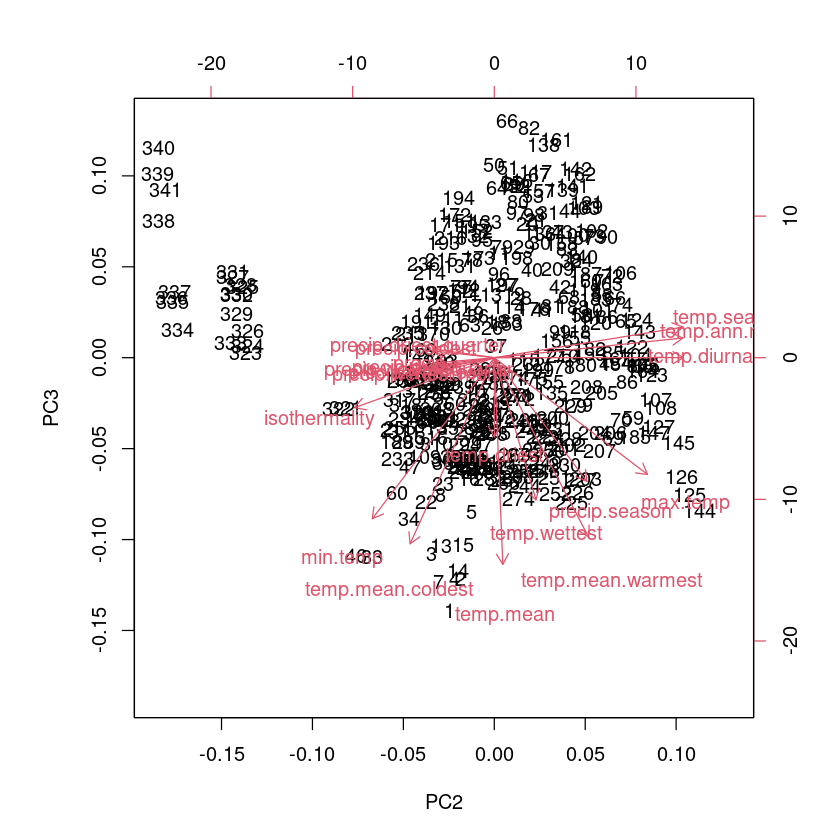

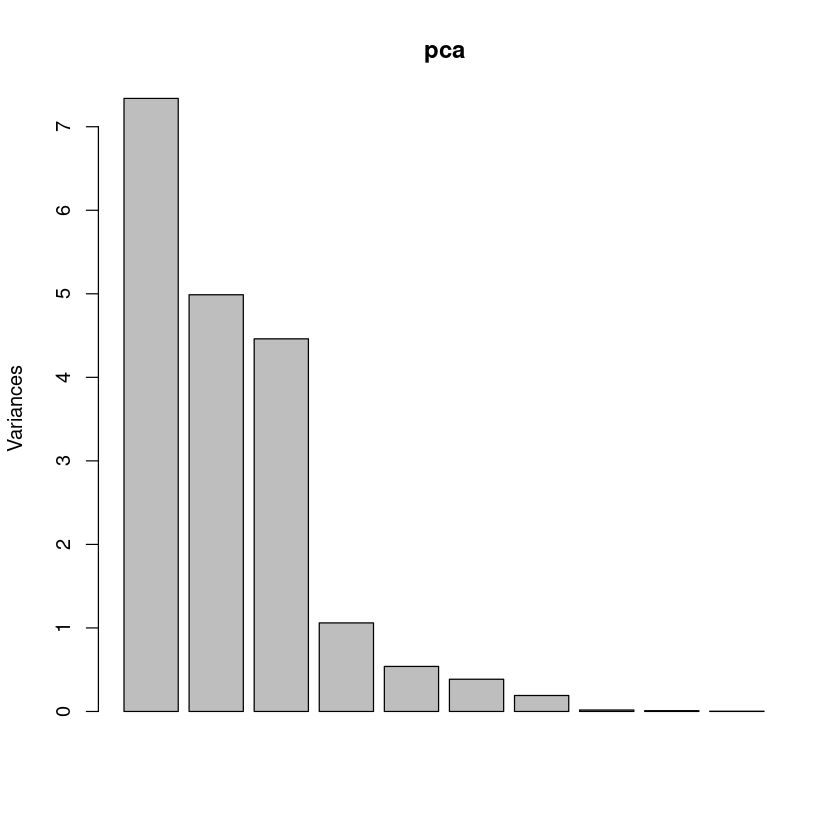

In [20]:
# a) Perform a scaled PCA on the data (same as a PCoA)
pca <- prcomp(data, scale=TRUE) #scaled data

# b) perform a biplot and screeplot of the data
biplot(pca)
biplot(pca, choices=2:3)
plot(pca)

**c) How many important axes of variation are there in global temperature and precipitation on the basis of this data? Describe each axis in one sentence.**
The above scree plot suggests the first three axes explain the most variation in the data. This can be confirmed by looking at the SD: PC1, 2, 3 have highest standard deviation, with a large drop off at PC4, suggesting we should only look to the first four axes. 

In [21]:
summary(pca) # give importance of PCAs
pca # Show how variables load onto PCAs

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.7091 2.2335 2.1121 1.02958 0.73430 0.62125 0.43738
Proportion of Variance 0.3863 0.2626 0.2348 0.05579 0.02838 0.02031 0.01007
Cumulative Proportion  0.3863 0.6488 0.8836 0.93942 0.96780 0.98811 0.99818
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.13300 0.09678 0.05643 0.04207 0.03356 0.02372 0.01822
Proportion of Variance 0.00093 0.00049 0.00017 0.00009 0.00006 0.00003 0.00002
Cumulative Proportion  0.99911 0.99960 0.99977 0.99986 0.99992 0.99995 0.99997
                          PC15    PC16     PC17     PC18      PC19
Standard deviation     0.01609 0.01277 0.009734 0.007947 3.466e-16
Proportion of Variance 0.00001 0.00001 0.000000 0.000000 0.000e+00
Cumulative Proportion  0.99998 0.99999 1.000000 1.000000 1.000e+00

Standard deviations (1, .., p=19):
 [1] 2.709106e+00 2.233528e+00 2.112107e+00 1.029578e+00 7.343020e-01
 [6] 6.212510e-01 4.373840e-01 1.330039e-01 9.678118e-02 5.643049e-02
[11] 4.206691e-02 3.356026e-02 2.372137e-02 1.822415e-02 1.608917e-02
[16] 1.277147e-02 9.734084e-03 7.946905e-03 3.466205e-16

Rotation (n x k) = (19 x 19):
                                PC1          PC2          PC3          PC4
temp.mean              -0.004465289  0.018319943 -0.467542227 -0.041955104
temp.diurnal.range     -0.111204029  0.404640891  0.000199959 -0.068697880
isothermality           0.202791075 -0.299282212 -0.112946957 -0.020219346
temp.season            -0.144027788  0.403976140  0.069238083 -0.025485492
max.temp               -0.125989802  0.327770099 -0.264102848 -0.065658004
min.temp                0.089990785 -0.260888225 -0.364198025  0.007455607
temp.ann.range         -0.148473976  0.403497297  0.044633496 -0.051986143
temp.wettest            0.012178657  0.089241306 -0.321831441  0.50

PC1 produces a mean precipitation that the data organises around (roughly)- this mean captures most variation in the dataset, PC2 shows how much variation there is from this mean precipitation. PC3 shows trends in variation of precipitation captured along PC2 (how data varies from mean variation).

In [22]:
# d) calculate the correlational matrix for these data, and use it to confirm 
# the conceptual links between a PCA and PCoA
cor(data) # the same as a distance matrix

temp.mean   temp.diurnal.range isothermality temp.season
temp.mean               1.00000000  0.06174489         0.2123167587 -0.10264866
temp.diurnal.range      0.06174489  1.00000000        -0.6534040016  0.92028006
isothermality           0.21231676 -0.65340400         1.0000000000 -0.86347935
temp.season            -0.10264866  0.92028006        -0.8634793487  1.00000000
max.temp                0.60845507  0.81116957        -0.4961948036  0.71087644
min.temp                0.74223414 -0.60557212         0.6890154615 -0.73295225
temp.ann.range         -0.04050135  0.97278198        -0.8001302567  0.98269956
temp.wettest            0.61617309  0.09864677         0.0001822373  0.07625826
temp.driest             0.36764455 -0.03280093         0.1201497083 -0.06945776
temp.mean.warmest       0.88963052  0.48581022        -0.1947351430  0.36144845
temp.mean.coldest       0.87781546 -0.39449299         0.5879520612 -0.56585622
precip                  0.02322054  0.03152774        -0.3231343859  0.11117255
precip.wettest.month    0.06597166  0.03655697        -0.3300830455  0.11967000
precip.driest           0.04073709 -0.01344958        -0.2686777738  0.05463070
precip.season           0.54495361  0.35622669        -0.3200642657  0.36190388
precip.wettest.quarter  0.04450267  0.02489383        -0.3168501500  0.10472306
precip.driest.quarter  -0.03942125  0.03351284        -0.3243521374  0.11360398
precip.warmest          0.05315306  0.01025063        -0.3030883419  0.08773698
precip.coldest         -0.03002748  0.02933454        -0.3175215266  0.10682908
                       max.temp    min.temp      temp.ann.range temp.wettest 
temp.mean               0.60845507  0.7422341421 -0.04050135     0.6161730865
temp.diurnal.range      0.81116957 -0.6055721221  0.97278198     0.0986467698
isothermality          -0.49619480  0.6890154615 -0.80013026     0.0001822373
temp.season             0.71087644 -0.7329522487  0.98269956     0.0762582645
max.temp                1.00000000 -0.0747268574  0.76677936     0.4477744705
min.temp               -0.07472686  1.0000000000 -0.69741501     0.3940813988
temp.ann.range          0.76677936 -0.6974150108  1.00000000     0.0681308118
temp.wettest            0.44777447  0.3940813988  0.06813081     1.0000000000
temp.driest             0.18056428  0.2962111865 -0.06090689    -0.0573003696
temp.mean.warmest       0.89946661  0.3583052575  0.41578099     0.6071734020
temp.mean.coldest       0.16187672  0.9688691970 -0.50733426     0.4749446016
precip                  0.13065969 -0.0487435438  0.12527883    -0.0723083704
precip.wettest.month    0.16199549 -0.0226936223  0.13103054    -0.0406459083
precip.driest           0.10196779  0.0008112687  0.07275967    -0.0490146015
precip.season           0.62323573  0.1403848325  0.35753792     0.4890058553
precip.wettest.quarter  0.13811482 -0.0293640651  0.11816189    -0.0617038969
precip.driest.quarter   0.09376214 -0.0952159668  0.12867620    -0.1303129990
precip.warmest          0.13115421 -0.0114957778  0.10165746    -0.0276082834
precip.coldest          0.09479608 -0.0852129390  0.12298022    -0.1357080305
                       temp.driest temp.mean.warmest temp.mean.coldest
temp.mean               0.36764455  0.88963052        0.877815464     
temp.diurnal.range     -0.03280093  0.48581022       -0.394492987     
isothermality           0.12014971 -0.19473514        0.587952061     
temp.season            -0.06945776  0.36144845       -0.565856218     
max.temp                0.18056428  0.89946661        0.161876724     
min.temp                0.29621119  0.35830526        0.968869197     
temp.ann.range         -0.06090689  0.41578099       -0.507334259     
temp.wettest           -0.05730037  0.60717340        0.474944602     
temp.driest             1.00000000  0.30768612        0.337805667     
temp.mean.warmest       0.30768612  1.00000000        0.563548855     
temp.mean.coldest       0.33780567  0.56354886        1.000000000     
precip     

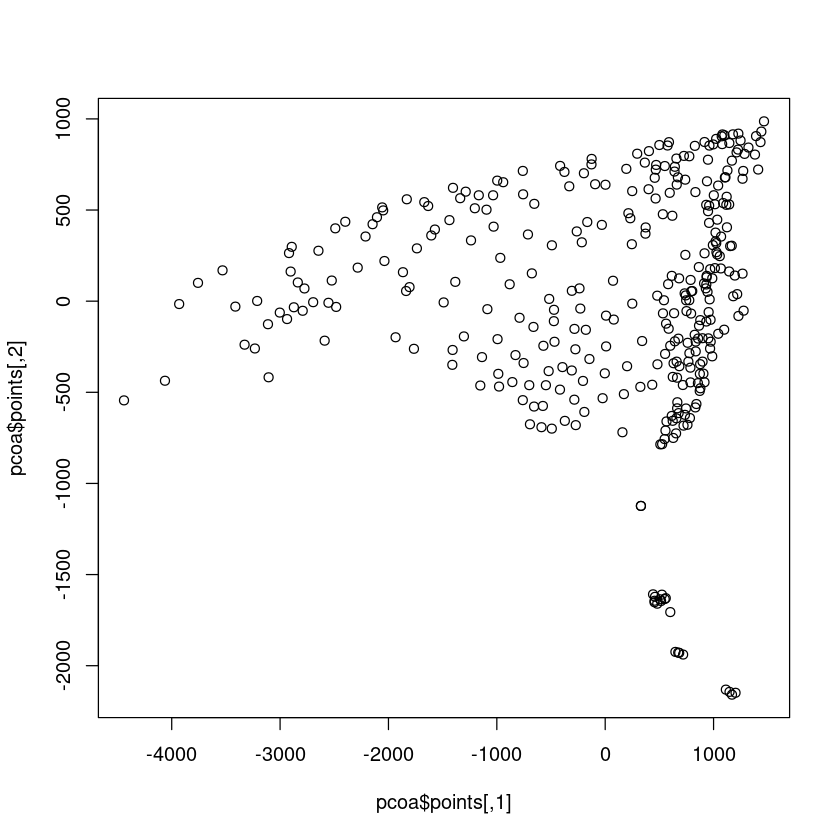

In [23]:
# PCoA analysis- gives same as PCA
pcoa <- cmdscale(dist(data), eig=TRUE)
plot(pcoa$points) # Mapped it on to only two axes

In [24]:
# e) Perform an NMDS on these data. Do you learn anything more/less than PCA or PCoA
nmds <- metaMDS(dist(data))

Run 0 stress 0.001507109 
Run 1 stress 0.08944838 
Run 2 stress 0.09027885 
Run 3 stress 0.1239773 
Run 4 stress 0.09699128 
Run 5 stress 0.07295348 
Run 6 stress 0.1185027 
Run 7 stress 0.08203999 
Run 8 stress 0.07056496 
Run 9 stress 0.1161405 
Run 10 stress 0.1124943 
Run 11 stress 0.08242412 
Run 12 stress 0.001515713 
... Procrustes: rmse 7.632907e-05  max resid 0.001124056 
... Similar to previous best
Run 13 stress 0.06195211 
Run 14 stress 0.09575872 
Run 15 stress 0.05865205 
Run 16 stress 0.09676676 
Run 17 stress 0.1021592 
Run 18 stress 0.04246868 
Run 19 stress 0.09034053 
Run 20 stress 0.0815033 
*** Solution reached


species scores not available



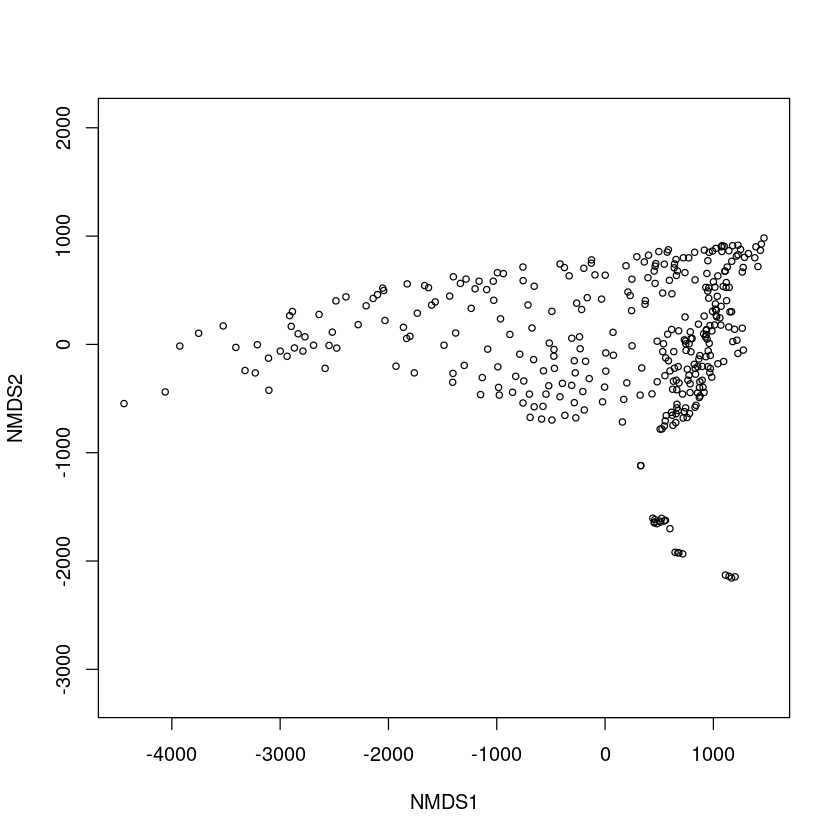

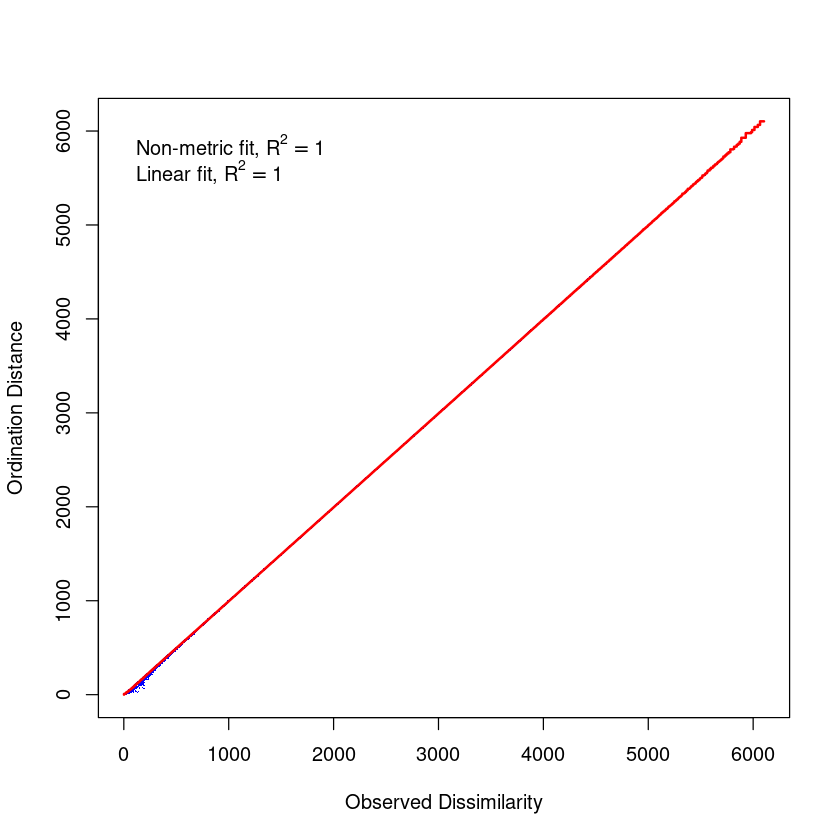

In [25]:
plot(nmds)
stressplot(nmds)

species scores not available



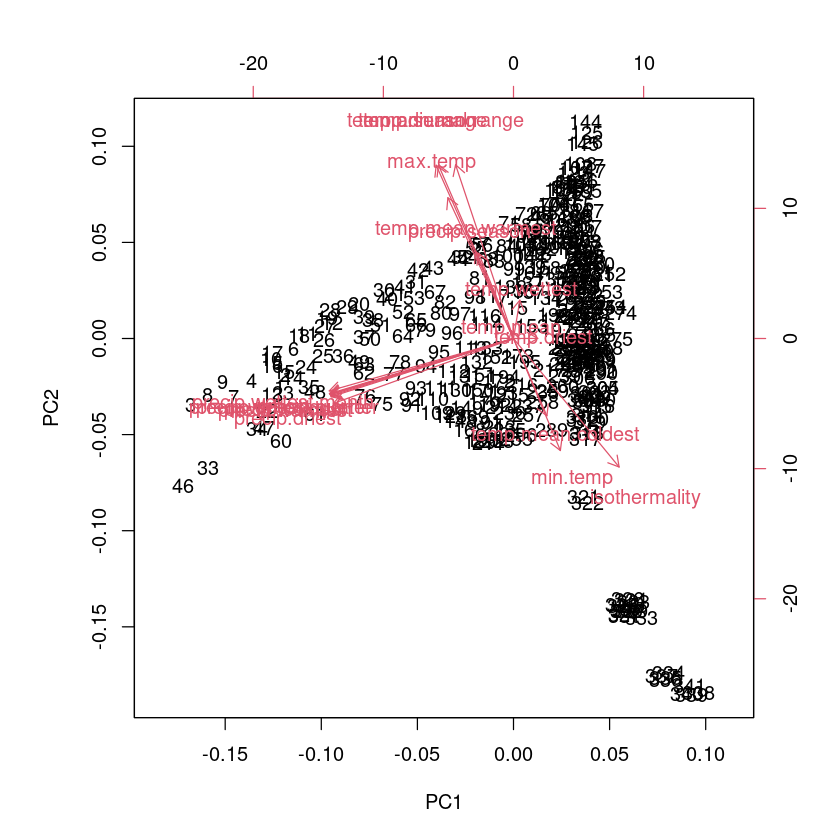

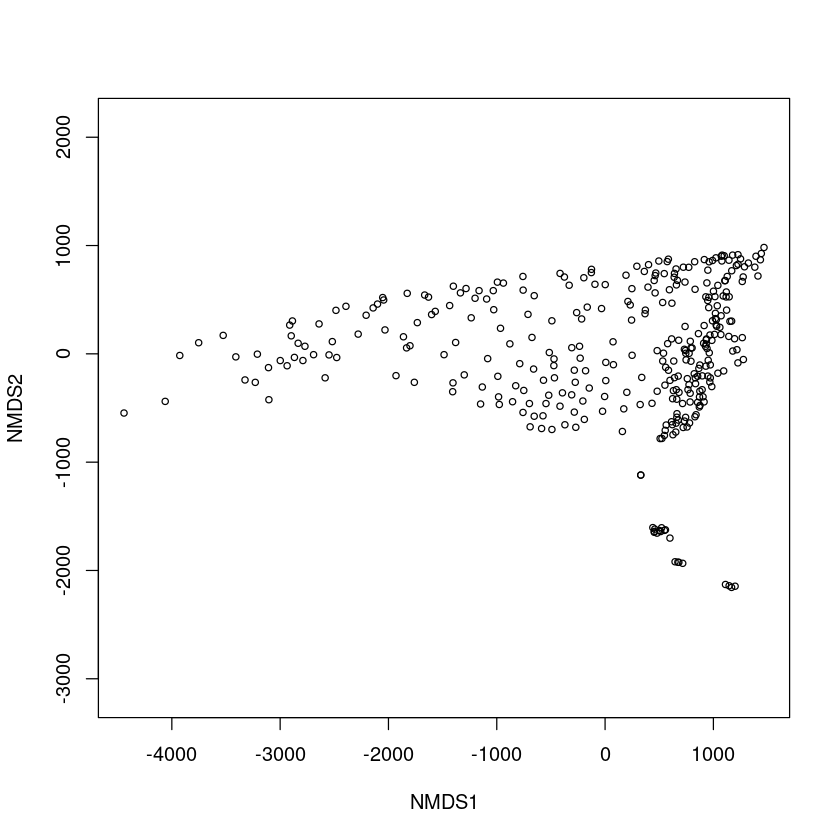

In [26]:
# PCA vs. NMDS
biplot(pca)
plot(nmds, ylim=c(-2000, 1000))

**2)** Download classic ecological dataset the Barro Colorado Island.

In [27]:
data(BCI) 
head(BCI)

Abarema.macradenia Vachellia.melanoceras Acalypha.diversifolia
1 0                  0                     0                    
2 0                  0                     0                    
3 0                  0                     0                    
4 0                  0                     0                    
5 0                  0                     0                    
6 0                  0                     0                    
  Acalypha.macrostachya Adelia.triloba Aegiphila.panamensis
1 0                     0              0                   
2 0                     0              0                   
3 0                     0              0                   
4 0                     3              0                   
5 0                     1              1                   
6 0                     0              0                   
  Alchornea.costaricensis Alchornea.latifolia Alibertia.edulis
1  2                      0                   0               
2  1                      0                   0               
3  2                      0                   0               
4 18                      0                   0               
5  3                      0                   0               
6  2                      1                   0               
  Allophylus.psilospermus ⋯ Virola.sebifera Virola.surinamensis
1 0                       ⋯ 17              4                  
2 0                       ⋯ 12              3                  
3 0                       ⋯ 11              2                  
4 0                       ⋯ 16              2                  
5 1                       ⋯ 31              6                  
6 0                       ⋯ 19              1                  
  Vismia.baccifera Vochysia.ferruginea Xylopia.macrantha Zanthoxylum.ekmanii
1 0                0                   1                  3                 
2 0                0                   0                  4                 
3 0                0                   0                  8                 
4 0                0                   0                 13                 
5 0                0                   0                  3                 
6 0                0                   0                  1                 
  Zanthoxylum.juniperinum Zanthoxylum.panamense Zanthoxylum.setulosum
1 0                       2                     0                    
2 0                       2                     0                    
3 1                       2                     0                    
4 1                       5                     0                    
5 0                       5                     0                    
6 0                       3                     0                    
  Zuelania.guidonia
1 0                
2 0                
3 0                
4 1                
5 0                
6 2

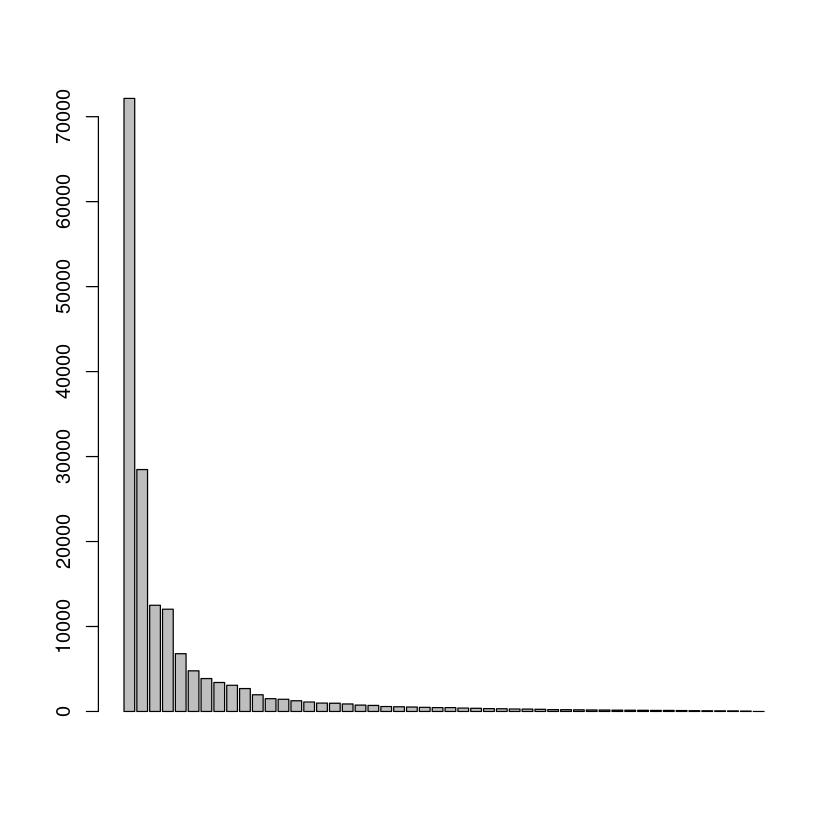

In [28]:
# a) Perform a PCoA of the BCI plot
dist <- dist(BCI)
pcoa <- cmdscale(dist, eig=TRUE)
barplot(pcoa$eig) # Quite a few variables of interest

In [29]:
plot(pcoa$points, type="n", xlab="PCoA1", ylab="PCoA2")
text(pcoa$points, labels=

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: plot(pcoa$points, type="n", xlab="PCoA1", ylab="PCoA2")
2: text(pcoa$points, labels=
  ^


In [ ]:
# b. Perform NMDS of BCI 
nmds2 <- metaMDS(dist)
stressplot(nmds2)

In [ ]:
plot(nmds2)

In [ ]:
bc_dist <- vegdist(data)

bc_pcoa <- cmdscale(bc_dist, eig=TRUE)
plot(bc_pcoa$points)

Plot above more similar to the biplot produced by PCA because Bray-Curtis distance is bounded to be between 0-1.

**3)** Figure our what is driving differences in community composition within the data. One of your supervisors thinks there are two kinds of communities here (hot vs. cold environments), while the other thinks species are responding to a gradient of temperature. Your task is to help them figure out what's going on. 

In [ ]:
# load data
comm <- as.matrix(read.table("~/Downloads/hot-sites.txt")) # a-t communities over 41 sites
site_data <- read.table("~/Downloads/site-data.txt") # temperature at 41 sites

# Build dataset for quantile regression
dist_data <- with(site_data, data.frame(
dist=as.numeric(dist(comm)),
temp=as.numeric(dist(temp)),
groups=as.numeric(dist(outer(groups,groups,`==`), method = "binary"))))

# Colour plot of data according to categorical variable
plot(dist_data$dist, col=ifelse(dist_data$groups==1,"red", "blue"),
    ylab="dist")

In [ ]:
# a) Perform an NMDs or PCoA of these data
pcoa_temp <- cmdscale(dist(comm), eig=TRUE)
barplot(pcoa_temp$eig) # one main variable
plot(pcoa_temp$points, type="n", xlab="PCoA1", ylab="PCoA2")
text(pcoa_temp$points, labels= dist_data$groups)

## Clustering
Above methods try to summarise a lot of continuous data into fewer varibles. Meanwhile, cluster analysis tries to detect discrete groupings in the data.

### Hierarchical cluster analysis
- Aim of this analysis is to make a *dendrogram*: each split in the tree takes you closer and closer to the data:
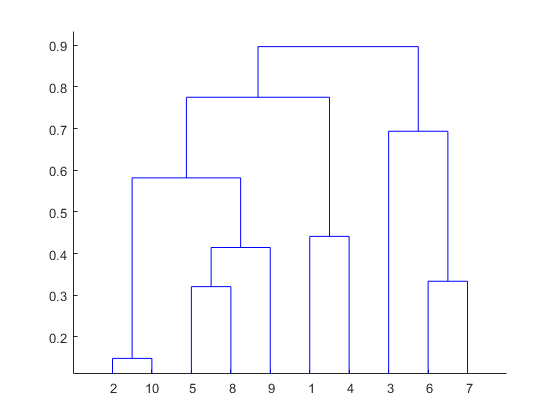
    - Example: take a load of continuous personality data of characters from star wars.A series of branching all with one root, and then various branching and tips with characters on them. Nodes along the way where lines break off. 
    - Ex: good or bad characters. Separates first into clearly good and evil, each along good branch branching at different points based on being good and X other characteristic. 
    - Can cut this at different heights- ie. can cut at top to just have goodies vs. baddies
    - builds a heirarchy for you that can be cut at different points, where there are various statistical methods you can use to decide where to cut for what. 
        - Imperfect as there may be unequal variation within groups, so finding  single cut type is difficult. 
        - Work best when data *is* hierarchal of some form, otherwise can be quite difficult. Fitting data into a hierarchy that are not easily made hierarchical. 
        - So in summary, when they're good they're good. Sometimes may be good, sometimes may be shit. 
        
**Method in essence**: How to do a hierarchal clustering
Imagine you had some data, in a distance matrix, plotted  onto x and y (abcde). How do we make a dendrogram? Builds from the bottom up, a "greedy" algorithm, goes in a single direction. 
1. Find the ones which are closest in space (a,b), and join them at their difference in space in the dendrogram, then remove them from the chart, and replace them with a new point, AB which is the *centroid* of them (the average of those points). 
    - Then do the same for the next two closest in space, DE, and replace with their centroid on the axis

Iteratively grouped and replaced heights, then interatively grouped our groups etc. Until we are left with two main groups, ABC and DE. 
- Can use various algorithms like UPGMA (which uses averge), and linkage methods etc. 

The thing that best determines the clustering is the data itself. 
- The distance algorithm you use will determine how good/bad the dendrogram is. What matters is using the correct distance algorithm/matrix. 
- Also needs the data to be hierarchical- otherwise not likely to find a good/meaningful fit. 
    - Where it goes well we see "big amoung group distances"- big difference between two main groups. With smaller distances within groups, especially as groups get smaller. 
    - Bad is where you see a comb, where big distance/variation amoung members of the same group- points to superficiality of the grouping. Most distance happens within goups. 
    - Need to be cautious when using hiearchal models, the way the algorithm works, will need to always end up with two groups, such that if three groups more or less similiar, will still represent the two which are more similar, even if not that poigniant. 
    
**Method in practice**
1. Start with a distance matrix, where type of distance used is down to how your data is distributed. 
    - Euclidean distance for Normally Distributed
    - Hamming/binary distance if data is discrete (just a count of the number of ways the two things are different, ie. Hamming distance "Will" vs. "Bill" is 1, since "W"!="B"
2. Once you have the matrix, find the data that are *most* similar to eachother (a,b)- they form a *cluster* (ab), and the distance matrix is updated to reflect every other point's distance from that cluster
3. Next, find the data point closest to the cluster(c), replace that with a cluster (abc), recalculate distances to the cluster and so on until all of the data is in a singlr cluster
    - In building the dendrogram, each time you join a piece into a cluster your data joins at another node. The lengths of all branches in the tree is proportional to distance between the last cluster and the newest node (tip to branch)

Last complication is *how you update* the distance matrix: 
- "Unweighted Pair Group Method with Arithmetic Mean (UPGMA) clustering means each time you form a new cluster the cluster updates to an average distance of all its members. 
    - This is quite good for evolutionary biologies as you want to reproduce phylogenies
- "Complete linkage clustering" is the default in R, and replaces a cluster with its maximum distance to each other data point in the pairing
- Choice of either really depends on what makes the most sense given your data.

In [ ]:
# Example: Simulate data that falls easily into three groups

data <- data.frame(rbind( # Each set of random numbers centers around a different mean
cbind(rnorm(50), rnorm(50)),
cbind(rnorm(50, 5), rnorm(50, 5)),
cbind(rnorm(50, -5), rnorm(50, -5))))

data$groups <- rep(c("red", "blue", "black"), each=50)  # Assign colours to groups
names(data)[1:2] <- c("x", "y")

with(data, plot(y~x, pch=20, col=groups))  # plot three groups

In [ ]:
# Create distance matrix with R's default Euclidean distance, since 
# data is normally-distributed
distance <- dist(data[,1:2])

# upgma method
upgma <- hclust(distance, method="average")
plot(upgma)

In [ ]:
comp_link <- hclust(distance)
plot(comp_link) # Complete linkage method

Can see three main groups in each- three main splits at the top, with main distances between them and lots of subgroups between them. 
- Also see how both compete linkage and UPGMA methods form similar numbers of clusters

Can also cut our data at a certain point, or into certain numbers of groups

In [ ]:
# cut data into groups
cut_by_groups <- cutree(upgma, k=2) # cut into first two groups
cut_by_groups
cut_by_height <- cutree(upgma, h=8) # cut at height 8
cut_by_height
# The two are equivilent! Splits into two groups at height 8

**How many clusters?**
How do we know how many groups/what height to do our cutting? There's no definitive answer, but helpful to think of it as a ratio problem. Where you cut will determine the ratio of average distance *amoung* clusters (between clusters) to the average distance *within* clusters. 
- Ie. cutting lower down means there will be greater within cluster distances, while cutting  further up means greater between (amoung) cluster differences.
All a question of what the ratio of average *amoung* cluster distance to *within* cluster distance should be
- In practice, we tend to want lower intra-cluster distance and higher inter-cluster distance (indicative of overarching groups/branching), but in practice it's difficult to find the "stopping point" where the ratio of the two is "correct"
- Recomends using *DD-weighted gap statistic*, which determines the number of clusters using the weighted gap statistic.
    - Compares the average distances amoung points within a cluster, for a given number of clusters 
    - When you hit the "correct" number of clusters, the DD-gap statistical peaks, and this is your ideal nuber. 
    
Though there is no fundamental, universally accepted definition of a "good" separation of data. It all comes down to your data and comon sense. 

### Kmeans 
A really popular algorithm for building clusters in an unhierarchical way. K=number of clusters we have, and means = centroids. For when we have lots of data we want to split into groups, but think they have no hierarchy. 
- Split into groups, with no relationship between groups (no nesting etc.)

**Method**: Imagine we have some data on xy axis (from a distance matrix), and they seem to fall into roughly two groups. 
1. Choose a number of clusters, and - a K. Kmeans requires you to choose how many groups you want to split everything into. This is more or less straight forward depending on the data. Where number of groups (k) is unclear, ther are variosu methods for this- randomely choose starting points to form centroids. 
- When groups are clear, you'll want random points for each groups
2. Assign group membership depending on the distance to the centroid. If you're closest to the red centroid, you're in the red group etc. 
3. Calculate the centroid (mean) of the groups, and record it (meanY, meanX)
4. Do it all again! Repeat (2) using the centroid of each group calculated in (3).
    - When we arrive at stable group membership (ie. all groups stay the same when repeated at group centroid), then we stop. Those are our finished clusters. 
        - This "Stability" can sometimes be given by an arbitrary critera, ie. when the two groups are similar *enough*
        
*How do we decide of k? (number of clusters)*
- Could do a PCA- choose first few axis that have most variation
- Can also use another method

In clustering, we care about *amoung* group distances, and *within* group distances. 
- Distance between groups (amoung groups)- where amoung group distances are big it's easy to know how many K we want 
- Where distances within clusters are quite large, the distances between (amoung) groups becomes less clear. 
- Can measure goodness of cluster(k) choice by dividing amoung group distances by within group distances
    - People will often plot the goodness of cluster choice by different values of K, and find the max. So a valuable ratio to use:
    $$
    \frac{amoung group distances}{within group distances}
    $$
- A good idea to run the kmeans a few times with different values of k (clusters/centers) and look for best ratio values

Contingency table/(confusion matrix) shows how data fits into the different groups. 
- Finds groups without any meaning between them (for the computer)- just based on distances between them. 

- mclust a useful package: estimates how many groups there are as well as group identities between them. Can plot out the AIC/BIC and see what number of components maximise the AIC/BIC. 
    - Where data is simple enough, works very well. 

# 02 Supervised Methods
Contains a number of powerful tools for solving common problems. Compliment GLM, but set themselves apart in terms of their flexibility. Since methods here are *supervised*, require you to ggive the algorithms exemplars of differents categories for which you are building the model to identify. This is different from above unsuperivsed methods, which pick out the categories for you.

Section introduces a few ML algorithms- a set of computational instructions that happen to work well. 

## Regression Trees
Regression trees *split* continuous data into discrete descisions, which is helpful for datasets with lots of explanatory variables.
- Starting at the top of the tree, you follow it down asking yourself at every step, whether the particular row of data youre trying to predict you're in has a lesser (go left) or greater(go right) value than the decision infront of you. 

*example*: Simulate plan diversity across a series of biotic gradients- temperature, humidity, soil Carbon etc. 
- Data follows Poisson distribution to give it some noise. Notice how you would have a great deal of difficulty picking out any of these relationships by eye. 

In [33]:
# build model of species diversity
data <- expand.grid(temperature=seq(0, 40, 4), 
                    humidity=seq(0, 100, 10), 
                    carbon = seq(1, 10, 1),
                   herbivores=seq(1, 10, 1))
data$plants <- runif(nrow(data), 3, 5) #generate biodiversity between 3-5
data$plants <- with(data, plants+temperature*.1) #add interaction with temp
# add interaction with humidity
data$plants[data$humidity > 50] <- with(data[data$humidity > 50,], plants+humidity*.05)
# add interaction with herbivores
data$plants <- with(data, plants+herbivores*0.1)
data$plants[data$herbivores > 5 & data$herbivores < 15] <- 
with(data[data$herbivores > 5 & data$herbivores < 15,], plants-herbivores*.2)

# Draw random data from poisson based on this
for(i in seq_len(nrow(data))){
    data$plants[i] <- rpois(1, data$plants[i])  # for each plant draw from poisson distribution with Lambda from above
}
head(data)

temperature humidity carbon herbivores plants
1  0          0        1      1          2     
2  4          0        1      1          2     
3  8          0        1      1          5     
4 12          0        1      1          5     
5 16          0        1      1          9     
6 20          0        1      1          6

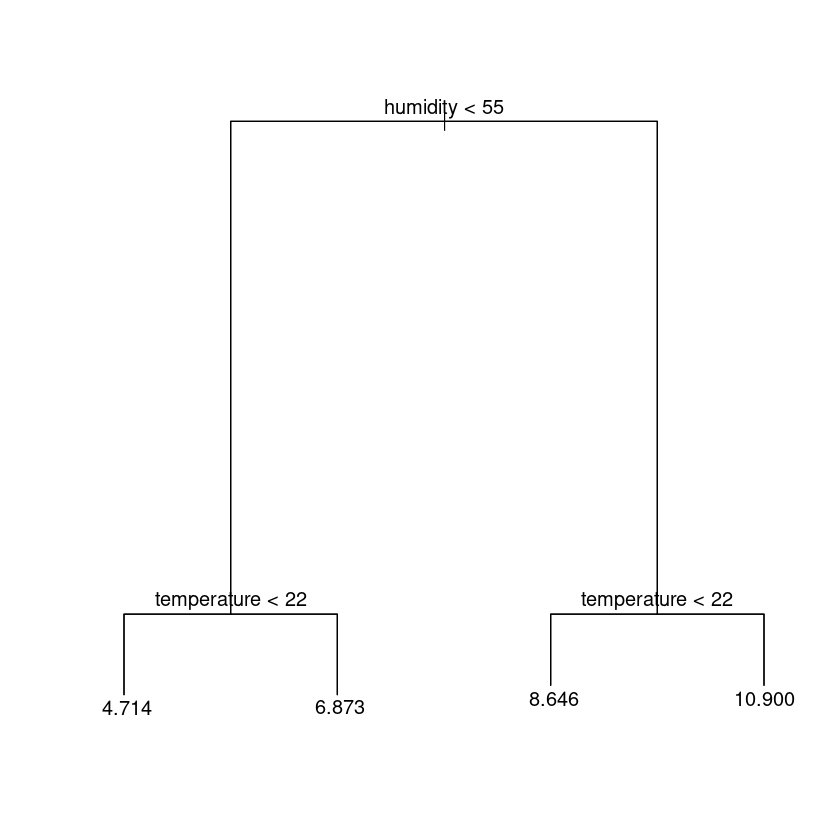

In [34]:
# Fit the regression tree: a series of 'decisions' you make
# Where each decision maps onto the value of the explanatory variable
# By the end, we have an estimate of the response variable (plant richness) you would expect
library(tree)
#1. Pick some training data and fit the model to it
training <- sample(nrow(data), nrow(data)/2) # sample half of the rows of data randomely
model <- tree(plants~., data=data[training,]) # use indexes from training data

#Examine the model
plot(model)
text(model)

In [35]:
# Examine Statistics
model
summary(model)

node), split, n, deviance, yval
      * denotes terminal node

1) root 6050 83120  7.463  
  2) humidity < 55 3334 26550  5.683  
    4) temperature < 22 1838 11040  4.714 *
    5) temperature > 22 1496 11670  6.873 *
  3) humidity > 55 2716 33040  9.648  
    6) temperature < 22 1506 14050  8.646 *
    7) temperature > 22 1210 15600 10.900 *


Regression tree:
tree(formula = plants ~ ., data = data[training, ])
Variables actually used in tree construction:
[1] "humidity"    "temperature"
Number of terminal nodes:  4 
Residual mean deviance:  8.659 = 52350 / 6046 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -8.895  -1.873   0.105   0.000   2.105  14.100 

The model found the main differences in variance caused by impact of various explanatory variables. But, to really be sure the model is working, we need to test its performance on data we didn't fit to it. 
- This is important to do in machine learning since it's not necessarily based on any fundamental, deep aspect of statistics- they just happen to work in the right circumstances

We can also cross-validate our model to see how it performs under different tree depths (number of nodes), seing how the mean squared error changes (calculated same as in normal regression) 
- It's your job to decide what constitutes a good fit. 


	Pearson's product-moment correlation

data:  predict(model, data[-training, ]) and data$plants[-training]
t = 61.334, df = 6048, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6034754 0.6345546
sample estimates:
      cor 
0.6192575 


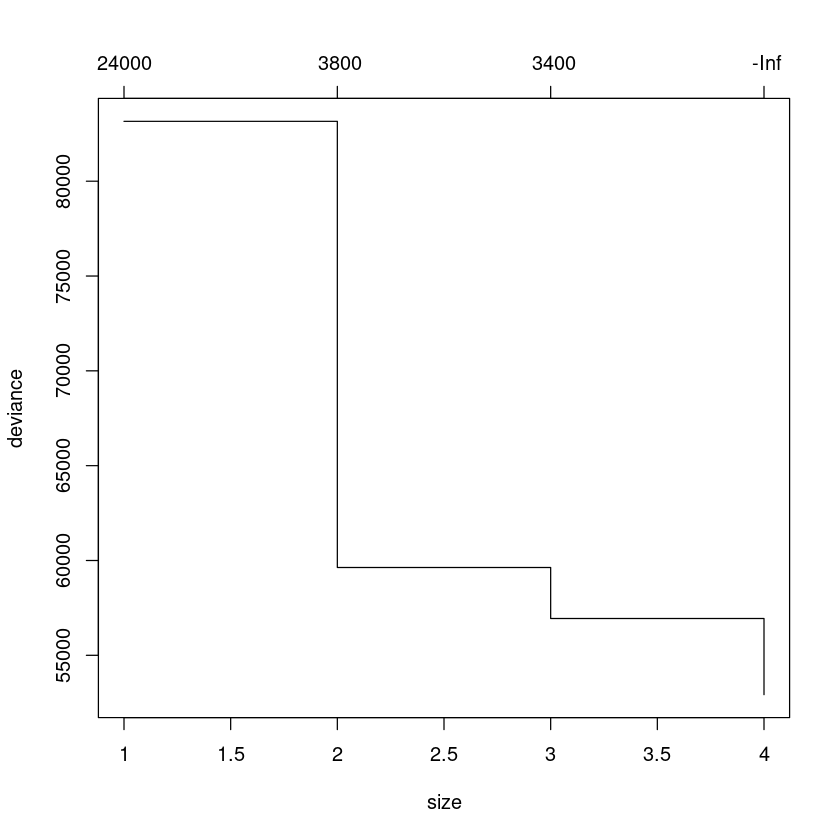

In [36]:
# Check performance outside training set
cor.test(predict(model,data[-training,]), data$plants[-training])

# Check cross-validation of models
plot(cv.tree(model))

cor is only 0.60... perhaps something to dow ith the rpois. If we replot it all with rnorm drawn plant values, we find a much higher correlation, 0.85

## Bagged Regression Trees & Random Forest
The problem with regression trees is they often fit your training data *too well*. That's why we need to test it on new data to see if it's overfit to the training set. 

Another way of dealing with the problem of overfitting, is to take random subsets of our training data, and fit regression trees to those *bagged* bootstrap replicates. We then use the average of all those regression trees. 
- In averaging across many bagged subsets of traning data, we reduce the variance amoung them, and thus reduce variance associated with only working with one sample of the data. 
- ie. if each time we fit a regression tree there is risk of overfitting, in averaging a few different overfit samples of our data, the model can then truly appreciate the diversity of variance. 

Here, mtry tells randomForest to cosnider all the variable available to it each time it's trying to make a new split in the tree. When we set any number less than the total numbers of variables, we restrict the number of options available randomely at each time. By effect, this randomely changes the available explanatory variables each time a split is considered.
- Means each of the bootstrap trees will resemble eachother less, thus we are decorrelating our trees
- This will improve our results as, when you take the average of correlated things, you don't tend to reduce variance. So by decorrelating our trees, the average of our models will be able to account for a greater variance, improving its ability to predict from novel datasets. 
- In doing so, we are also building a *random forest* model

In [46]:
library(randomForest)
model <- randomForest(plants~., data=data[training,], mtry=ncol(data)-1, importance=TRUE)

In [45]:
cor.test(predict(model,data[-training,]), data$plants[-training])


	Pearson's product-moment correlation

data:  predict(model, data[-training, ]) and data$plants[-training]
t = 60.427, df = 6048, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5976026 0.6290356
sample estimates:
      cor 
0.6135621 


The above model fit thousands of regression trees. Can use importance option to show off variable importance (the average decrease in mean squared error each time a split in regression tree is fit to a particular explanatory variable- the r-squared of each variable)
- Since we can't look at a single regression tree anymore (we've fit thousands), this is the best way to understand what a variable is doing in your model

In [42]:
model <- randomForest(plants~., data=data[training,], importance =TRUE)
importance(model)

%IncMSE   IncNodePurity
temperature 115.17962 10820.225    
humidity    147.76547 24566.874    
carbon      -11.02295  3069.268    
herbivores   36.69939  4400.474

In [43]:
cor.test(predict(model, data[-training,]), data$plants[-training])


	Pearson's product-moment correlation

data:  predict(model, data[-training, ]) and data$plants[-training]
t = 67.901, df = 6048, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6431594 0.6717649
sample estimates:
      cor 
0.6576992 


## Boosted Regression Trees 
The most "meta" of regression trees, this algorithm fits a series of models, but each time to the residuals of the model before, which is then added in to the set of predictions of the previous model, so you end up with a hybird of a regression tree fitted to original data, and a series of models that try to fit the variation the first model didn't fit very well
- approach intends to avoid overfitting, but at cost of making the interpretation of the model more obscure (though ML seems more motivated by getting results!)

Two parameters:
- gbm allows you to fit a link function, just like in a GLM. 
- shrinkage paramter controls the relative importance of the earlier vs. later fitting models, where smaller values mean the latter values are given relatively more weight (tends to work best to avoid overfitting). 

Loading required package: gbm

Loaded gbm 2.1.8



var         rel.inf  
humidity    humidity    67.506520
temperature temperature 26.660534
herbivores  herbivores   5.832946
carbon      carbon       0.000000

ERROR: Error in eval(predvars, data, env): object 'plant' not found


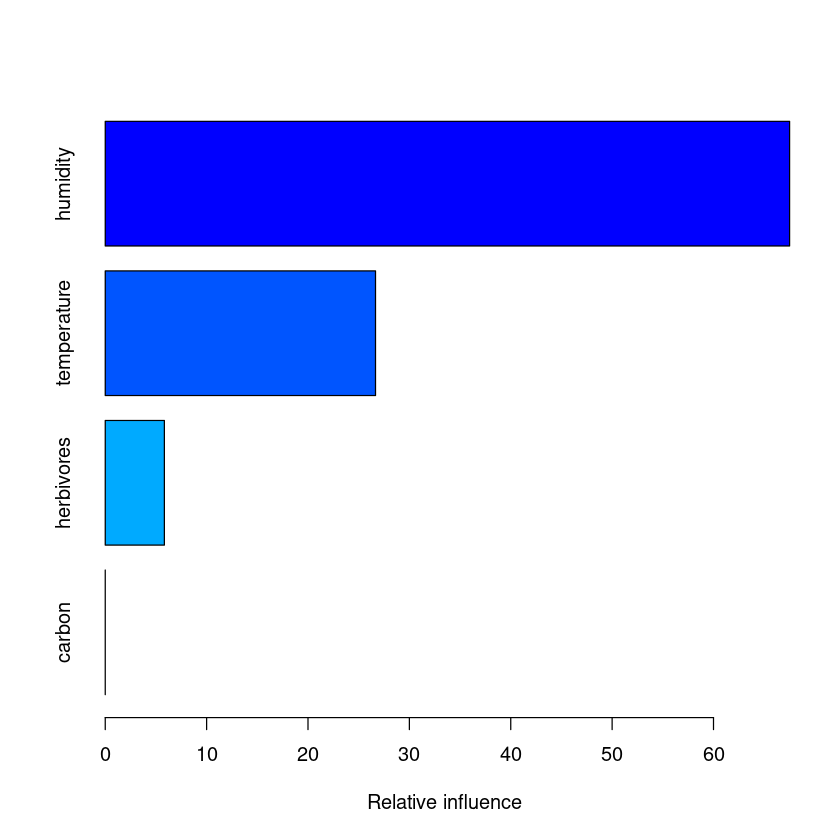

In [49]:
require(gbm)
model <- gbm(plants~., data=data[training,], distribution="poisson")
summary(model)

faster.model <- gbm(plant~., data=data[training,], distribution="poisson", shrinkage=.1)

## Lasso Regression and Least Angular Regression (LAR)
While regression trees are quite happy to incorporate all factors into a model, and their relative importance is a sidenote, the whole purpose of Lasso regression and LAR is to pick the most relevant explanatory varibles- and which you can discard!

All regression technqiues learned on this course involve *least squares* methods, where we square  residual error because working with squares is a *lot* easier than working with the absolutes (modulus). 

Lasso regression tries to minimise the modulus of error, subject to the constraint that we don't want the sum of absolute value of our coefficients to be too great. 
- This sum of absolute value of coefficients is called the "$L_1$ arc length", or *lasso penalty*. Minimising it keeps the complexity of our model as low as possible. 
- Process here is exactly the same as linear regression with multiple variables, the only difference is we can't use norma calculus to estimate which variables are significant
    - Instead, we try to minimise this penalty and see how much better/worse our predictions get

**Method**
1. Start with a penalty/arc-length that is infinitely small, and plot how much better/worse our predictions get as we increase the penalty (introduce more/larger coefficients)
- See in image below, arc length starts at zero, then increase along the dotted line. As arc length increases over various thresholds, new coefficients are introduced, then begin to increase (seen by coloured lines).
- Somewhere between a model arises that optimally trades complexity for explanatory power (fit)
2. Aim is to find arc-length where model fit doesn't increase with more coefficients- this is our best, simplest model. 
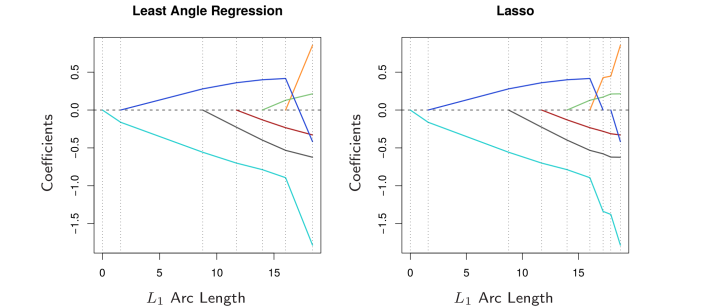

*Least angle regression (LAR)* very similar to Lasso
- As penalty increases, we increase the explanatory variable (x) most correlated with the response variable and gradually increase it's coefficient as much as arc will allow. 
- Eventually another explanatory variable will coreelated more with the left-over vvariation, and then we begin increasing that variable's coefficient. 
    - called least 'angle' regression since geometrically when we're adding variables we're moving the 'angle' of the coefficients in the direction that matches residual variation with each step. 

In practice, both these techniques are extremely similar however- as can be seen by similarity in the two plots above!

Loading required package: lars

Loaded lars 1.2




[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 0    0    0    0    0    0    0    0    0    0     ⋯     0     0     0    
[2,] 0    0    0    0    0    0    0    0    0    0     ⋯     0     0     0    
[3,] 0    0    0    0    0    0    0    0    0    0     ⋯     0     0     0    
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] 0     0     0     0     0     0     0    
[2,] 0     0     0     0     0     0     0    
[3,] 0     0     0     0     0     0     0

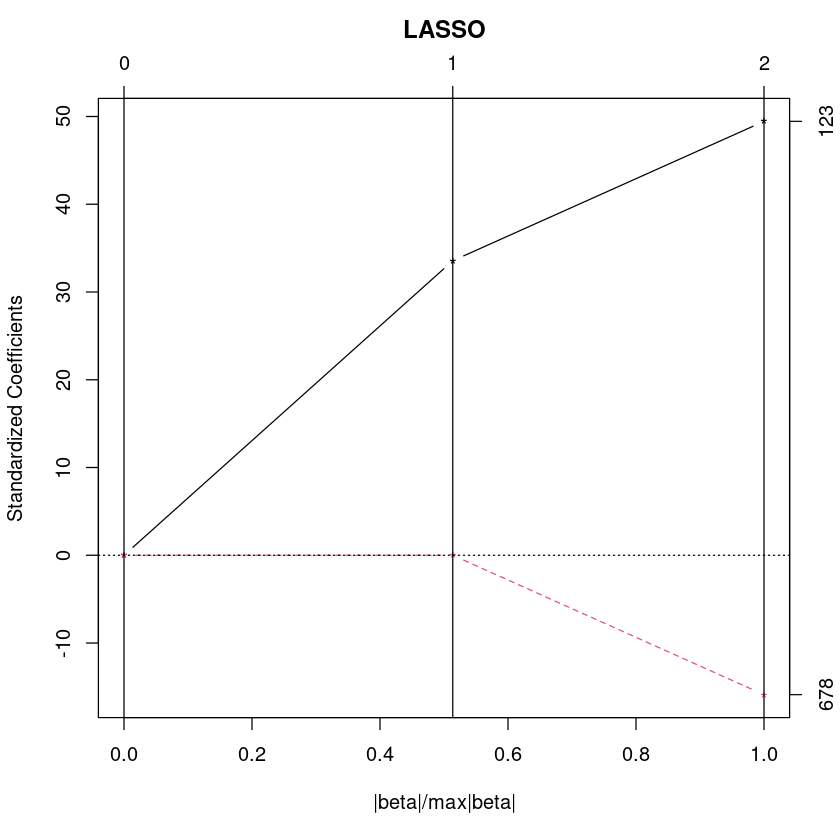

In [2]:
# Example! 
# Let's simulate 100 explanatory variables, of which only two are significantly 
# related to our data

# Problem: which variables "significantly" explain our response variable?
explanatory <- replicate(1000, rnorm(1000)) # 1000 explanatory vars with samples instances each
response <- explanatory[,123]*1.5-explanatory[,678]*.5 # response defined by two

# fit lasso regression- using lars package because LAR can be used to generate
# lasso estimates more efficiently
require(lars)
model <- lars(explanatory, response, type="lasso")
plot(model)
coef(model) # all zero except for two

Not exactly easy to get estimates of our coefficients out of this model- despite having its own stopping criteria for when a model is "good enough", lasso (and LAR) give you coefficients for step in the search. Luckily quite easy to make a wrapper:

In [3]:
# Find best coefficients
signif_coefs <- function(model, threshold=0.001){
    # Returns coefficients significant past a threshold
    coefs <- coef(model)
    signif <- which(abs(coefs[nrow(coefs),]) > threshold ) # find which coefs are greater than threshold
    return(setNames(coefs[nrow(coefs), signif], signif))
}
signif_coefs(model)

123  678 
 1.5 -0.5

Of course, lasso regression works extremely well- from 1000 input explanatory variables, it correctly estimates the two variables that mattered!

Now let's look at Lars 

### The importance of SCALING
Everyone knows standard linear regression assume independent, Normally-distributed variables. Every single *statistical solver* assumes your variables are scaled and centered. Means your explanatory varibles should all be *z-transformed*
$$
z_i=\frac{x_i-\bar{x}}{sd}
$$
- $z_i$ = each z-transformed sample observation
- $x_i$ = original values of the sample
- $\bar{x}$ = sample mean
- $sd$ = standard deviation of sample

The maths/computing will be driven by the variables that vary over a greater range (means its coefficients will be larger)
- Thus, numerically a computer might miss a coefficient whose value is very small (small variance), even if when z-transformed the variable would be much more signficiant than a variable with a much greater (but less important) coefficient. 

To illustrate this point, let's fit a LARS model 

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 0    0    0    0    0    0    0    0    0    0     ⋯     0     0     0    
[2,] 0    0    0    0    0    0    0    0    0    0     ⋯     0     0     0    
[3,] 0    0    0    0    0    0    0    0    0    0     ⋯     0     0     0    
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] 0     0     0     0     0     0     0    
[2,] 0     0     0     0     0     0     0    
[3,] 0     0     0     0     0     0     0

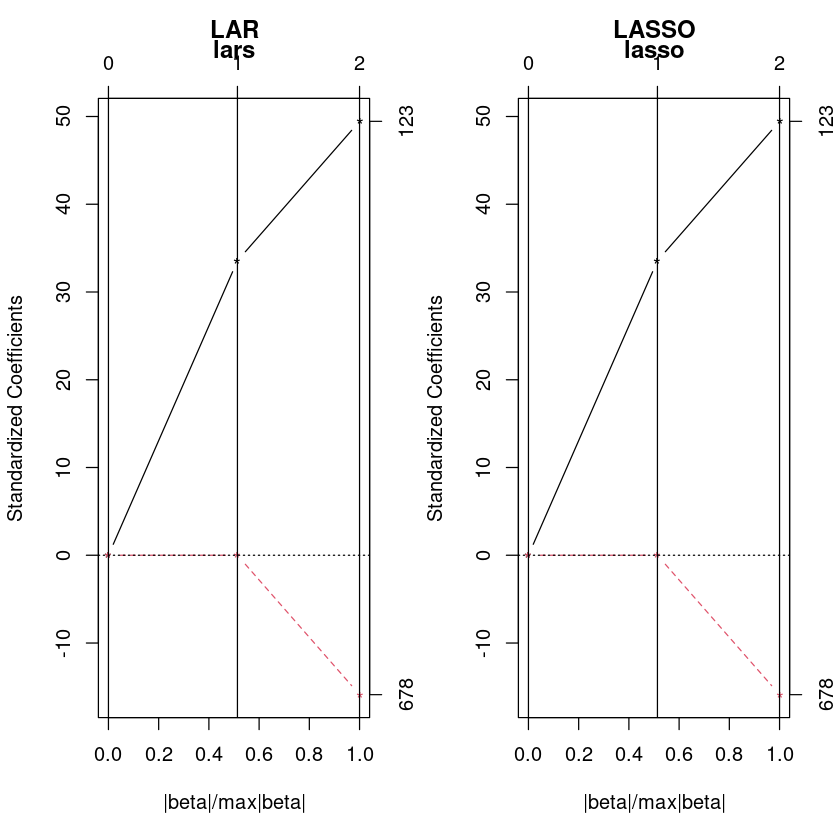

In [5]:
lars_model <- lars(explanatory, response, type="lar")
par(mfrow=c(1,2))
plot(lars_model, main="lars")
plot(model, main="lasso") # essentially the same
coef(lars_model)

In [10]:
# Now let's try turing the default scaling OFF
bad_model <- lars(explanatory, response, type="lar", normalize=FALSE) #taking a while

In [11]:
signif_coefs(bad_model, thresh=0) # Thats a lot of coefficients :(())

1             2             3             4             5 
 3.130165e-12  4.552300e-11 -3.387251e-11  4.004816e-11  3.810914e-11 
            6             7             8             9            10 
 7.988491e-11 -5.208026e-11  9.167856e-11  1.806210e-10  5.457780e-11 
           11            12            13            14            15 
 1.284326e-11  1.216178e-10 -5.759539e-11  5.329781e-11 -1.962370e-11 
           16            17            18            19            20 
-1.006645e-10  2.763649e-11 -1.321585e-10  1.464091e-10  2.701680e-10 
           21            22            23            24            25 
 3.987257e-11  7.084512e-11  1.129819e-10  6.034922e-11  9.491566e-12 
           26            27            28            29            30 
-1.304384e-10  8.225422e-11 -2.117945e-11  1.070492e-10 -3.233895e-11 
           31            32            33            34            35 
-6.933521e-11 -1.404555e-10  1.374223e-10 -9.134638e-11 -3.855980e-11 
           36            37            38            39            40 
 8.164798e-11 -1.536912e-11 -1.123458e-11 -1.971491e-11  2.460990e-11 
           41            42            43            44            45 
 6.490564e-11 -5.115699e-11  4.750800e-11  4.449342e-11 -2.240487e-11 
           46            47            48            49            50 
-8.685073e-11  4.551329e-11 -2.371199e-11 -2.630401e-13 -6.763068e-11 
           51            52            53            54            55 
-6.081136e-11  3.046059e-11  9.350751e-11 -2.371036e-11  1.755528e-11 
           56            57            58            59            60 
-6.933858e-11 -1.439322e-11 -2.575440e-11 -1.225742e-10 -2.073091e-11 
           61            62            63            64            65 
 8.952348e-11  1.559157e-11  3.437383e-11 -4.366785e-11  5.134972e-11 
           66            67            68            69            70 
 5.075822e-11  2.928222e-11 -3.190191e-11 -2.154469e-11 -1.021067e-11 
           71            72            73            74            75 
-6.647092e-11 -5.651694e-12  2.459691e-11  5.300621e-11  2.383103e-13 
           76            77            78            79            80 
-4.459253e-11 -9.645286e-11  2.559611e-11  9.962243e-12  1.157591e-11 
           81            82            83            84            85 
-5.932347e-11 -6.489765e-11 -3.401385e-11  2.102511e-11 -1.887536e-10 
           86            87            88            89            90 
-6.711074e-11  6.888502e-11  2.604665e-11  5.537942e-11  7.479919e-11 
           91            92            93            94            95 
-1.519489e-11 -4.079983e-12  4.297922e-11 -6.466254e-11 -1.678242e-11 
           96            97            98            99           100 
-3.392773e-11  8.112803e-11  2.629751e-11 -5.068816e-11 -1.274192e-11 
          101           102           103           104           105 
 1.274846e-10  6.557804e-11 -5.118781e-11  2.808113e-11  9.459655e-11 
          106           107           108           109           110 
-1.201572e-10  3.321789e-11  2.164244e-11  6.034493e-11 -6.502465e-11 
          111           112           113           114           115 
 5.141919e-11  4.438479e-11  3.952176e-11 -1.197980e-11  5.524469e-11 
          116           117           118           119           120 
-4.168768e-11 -5.352670e-11  2.016324e-11 -1.054340e-10  8.937575e-12 
          121           122           123           124           125 
 1.092364e-10  1.195334e-11  1.500000e+00 -2.957332e-11 -4.128411e-11 
          126           127           128           129           130 
-8.882876e-11 -8.239670e-11 -9.250043e-11 -4.523276e-12  5.451364e-11 
          131           132           133           134           135 
 8.677779e-11  5.516399e-13  2.755568e-11  4.529775e-11 -4.400924e-11 
          136           137           138           139           140 
 3.385316e-11  2.206719e-11  5.375208e-11  5.759540e-11  2.473836e-11 
          141           142         

## Support Vector Machines (SVM)
Useful for splitting data into groups- supervised complement to clustering algorithms above, but with broad application to continuous response variables. 
**USE**: imagine you have data split into two categories (see picture below). Imagine we want to draw a single line that separates them (a *separating hyperplane*)
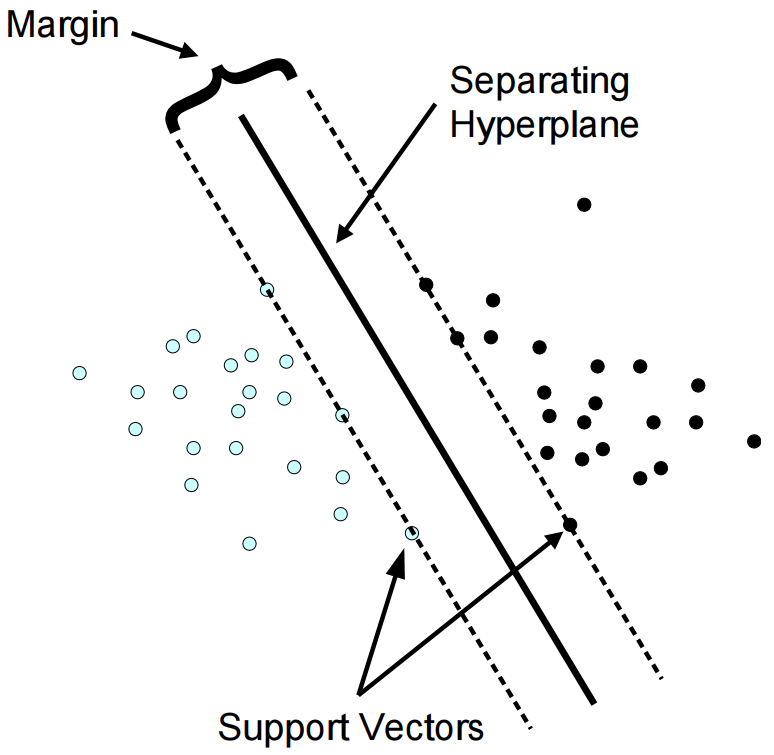
- In theory, infinite # of lines could separate the two groups, so instead we are interested in the "best" line, or the *maximal margin hyperplane*": the line that has the *furthest minimum distance* to the points in the data. 
    - where the minimal distance is called the *margin*, and the points that lie on the margin are the *support vectors*
- Thus, in finding the maximal margin hyperplane, the only points in our two groups that matter are the margins. 
    - Thus the sole purpose of SVM is to identify these points in the margin. 
    
SVM really exciting since it can fit any kind of classifier we want- need'nt be a straight line. Could draw a polynomial, or even a circle by specifying a different equation for that line which we call a *kernal*

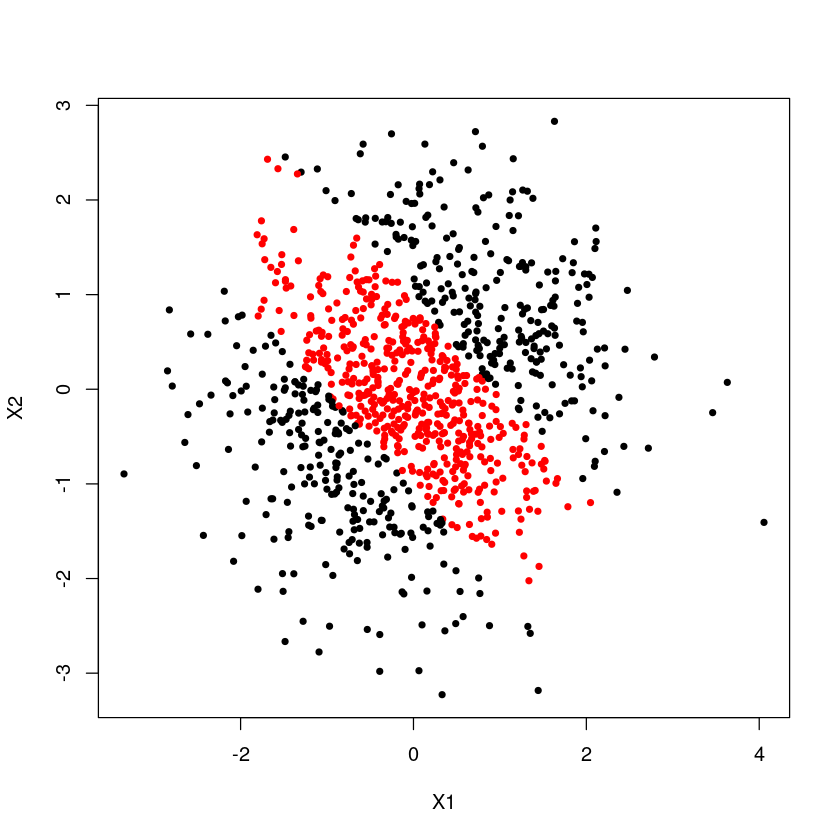

In [17]:
# Example: Simulate data with two random variables 
data <- data.frame(replicate(2, rnorm(1000))) # two r.v. of 1000 each
data$y <- rowSums(data) > (median(rowSums(data))-1) &
(rowSums(data) < (median(rowSums(data))+1)) # is median-1 < rowsum < median+1

# plot data
with(data, plot(X1,X2, pch=20, col=ifelse(y, "red", "black")))

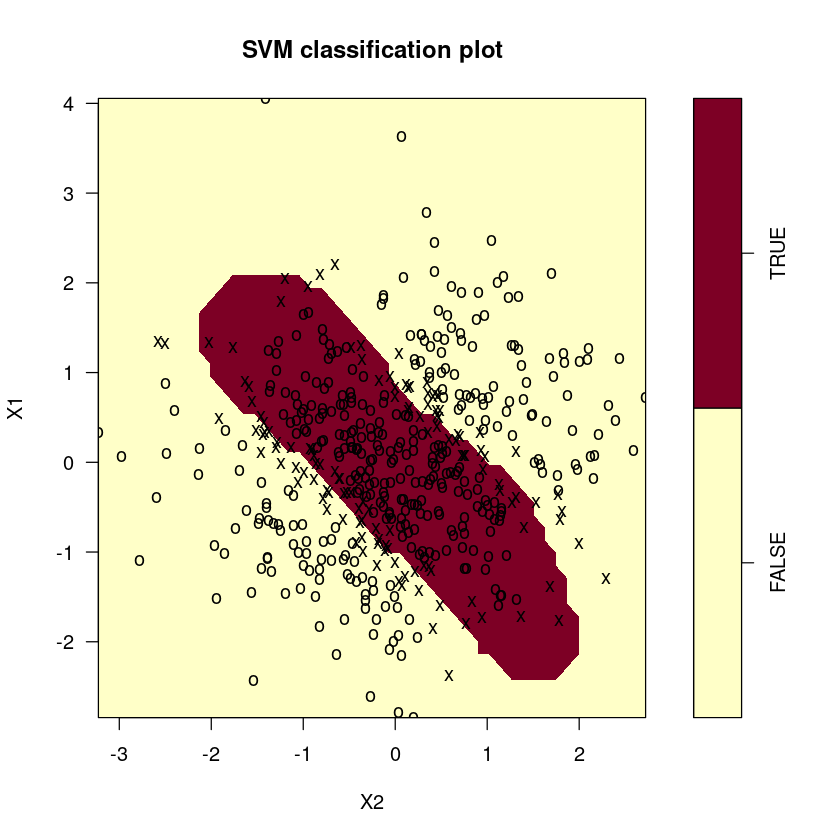

In [19]:
# Try to fit an SVM using default radial kernal 
library(e1071)
training <- sample(nrow(data), nrow(data)/2)
model <- svm(y~., data=data[training,], type="C")
plot(model, data[training,])

Success! SVM has identified the region in the center as different, and seems to have predicted the training data quite well. 

# 03 Artificial Neural Networks
a.k.a. the thing that makes the terminator work. Methods are incredibly powerful- use them to do things so you don't have to. 

Artifical neural networks can be used to solve complex problems, though never understand how it was done. 
- Can take image and sound data as raw input (can use for identification etc.)
- Able to autoencode/compress data data

Designed based on advances in neural anatomy, and made up of several layers: 
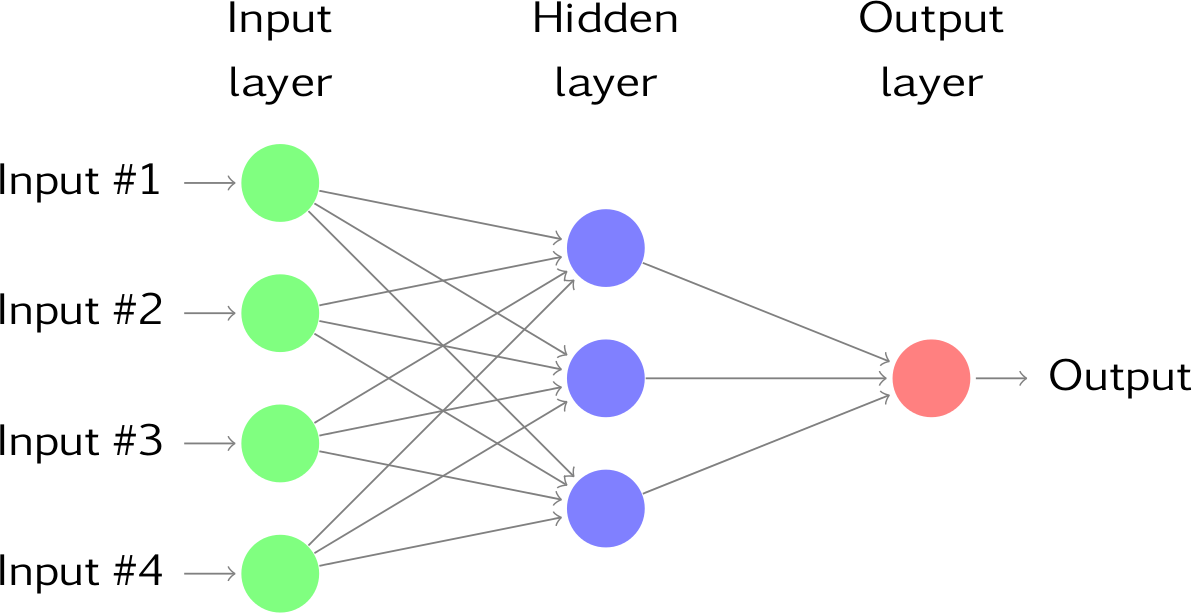
- *Input layer*, where each node represents an explanatory variable
- *Outer layer* of any single layer represents predictions of the explanatory variables
- One or more *hidden layers* that fit inbetween and form the basis of the model. 

**Crash overview:**
Each hidden layer takes a signal/input from all of the nodes in the previous layer, be it the input layer or another hidden layer. 
- Each connection from one node to the next has a particular *weight*, which determines how strongly the signal is passed from one note to the next
- Each *node* has an *activation function* which determines how it handles/transforms the inputs from other nodes- how it summarises this data before passing it to the next layer. 
    -  These are super important to the system, and are what make Artificial neural networks interesting. If the activation function were perfectly linear (ie. 1:1 input=output), then an artificial neural network above, which is fully interactive/connected, is mathemetically identical to standard regression: $lm(y~input1*input2*input3*input4)$
        - Work by summing up all the input in a defined way, and passing the output on to the next layer.
    - Meanwhile, weights are important since they modulate magnitude and dirction (positive/negative) of each node's effect on every other node
        - Each signal is mulitplied by the weight of the path it is traversing. 

### Model Fitting

**Goodness of fit** is usually calculated with mean sum of squared error (MSE)- Difference between predicted y and actual y, squared, over total number of results
$$
\frac{\Sigma(\hat{y}-y)^2}{n}
$$ 

The fitting approach itself involves **backpropogration**: the model predict a given output (feedforward step), then the error is propograted (spread) back through the neural network, and each node is altered depending on how much of the error was attributed to it.
- Error is attributed to different nodes since for each node, the network knows what the output value should have been, so it can simply find the error at each node. 
- The whole process is ten repeated until the MSE seems to have converged/stabilises to single limit.

*Lasty* it is extremely important for the fitting process that all the input data including the response variable is normalised. This is because the fitting process requires error to distribute evenly. If the variables are not directly comparable, this is impossible and the whole thing falls apart.

**The exploding/vanishing gradient problem**

With lots of nodes and weights, it's possible for signal values to quickly become very big or very small even in a small number of layers.
- this means even small changes in weights can very suddenly have a HUGE impact (exploding gradient)
- or that very big changes in weights make very little different (vanishing gradient, when numbers get very small, hard to mulitply then by anything to get back to large value).

*Solutions*: 
1. Standardise your coefficients (mean 0, std=1), you would need to mulitply by very high or very low numbers to have any explosion/vanishing. 
2. Add a constant layer (intercept) to your activation function to keep everything grounded.

#### Simple Neural Network
Let's start with an artificial network so simple it doesn't have any hidden layers. 

In [83]:
x <- rnorm(1000) # x is standardised as drawn from standard Normal
y <- -x # response variable is negative x
data <- data.frame(scale(cbind(x,y))) # Scale both variabes
library(neuralnet)

model <- neuralnet(y~x, hidden=0, data=data) # no hidden layers, and simple linear activation function
plot(model)

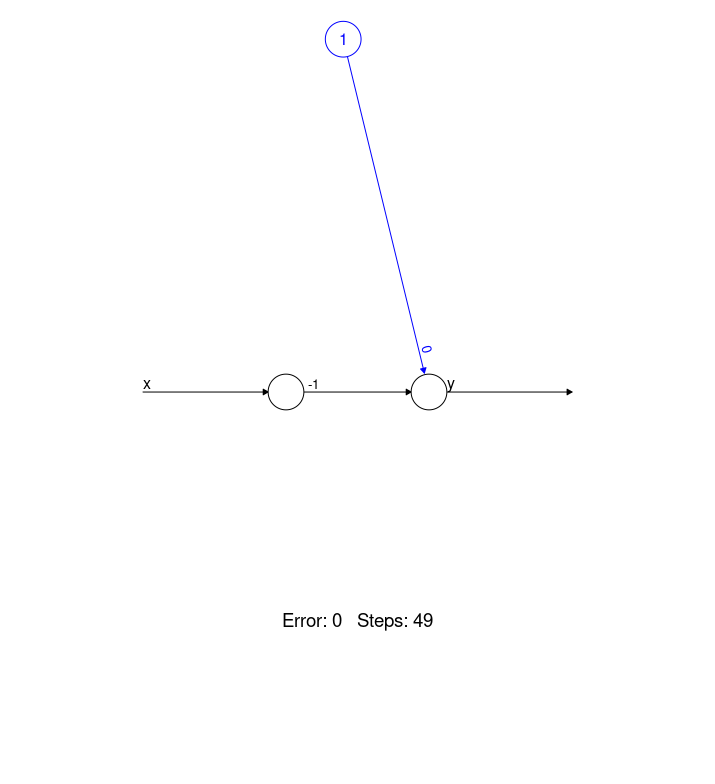

So simple you can see everything going on. The data going in (x), the weight that the node has on the output (y).
- The little blue flying (1) is the function of normalising everything. It is just a nuissance term, so ignore it.

The output is more or less what we predicted of y, and it took 49 steps to arrive at it. 

Now on to a more complicated number. Y is going to be a function of 10 explanatory variables:
$
y = 2a-\frac{b}{2}-ij+e^{|c|}
$

In [94]:
explanatory <- data.frame(replicate(10, rnorm(400))) # do rnorm 10 times
# 10 input nodes/explanatory variables
names(explanatory) <- letters[1:10]
response <- with(explanatory, a*2-0.5*b-i*j+exp(abs(c)))
data <- data.frame(scale(cbind(explanatory, response)))
head(data) # each input (explanatory variable) and expected output y (response)

a           b          c          d           e           f           
1 -0.63100985 -1.0087370 -0.8223833  1.42818632  1.55117174 -1.666150087
2 -0.08614753  0.9581603  0.2582304  0.04893668  0.08029521 -1.867243303
3 -1.66874985 -0.2479953 -1.5117126 -2.42177281 -0.41782266 -0.008189954
4 -0.19010818  2.0016815 -0.0770228 -0.08124501  0.08911303 -0.883589702
5 -2.90167232  0.4285173 -0.5969373  1.39911174  0.64674671 -0.746442910
6 -1.02107320 -0.5420492  1.0699356 -1.22668548 -0.02959326 -0.834518283
  g           h            i          j           response  
1 -0.43715821 -1.365468506  0.7103047  0.18127473 -0.4164788
2  0.04476703  0.792834668 -0.5236434  0.68191309 -0.4784251
3 -0.83081060  0.700235805 -1.6666237 -0.66203513 -0.8633487
4 -1.19594856  0.709240508  0.5269297  0.55019625 -0.9865983
5  0.07292543 -0.004883377  0.2527586  0.58917713 -2.1256870
6  1.48831940 -0.294391330 -0.3649732 -0.01223417 -0.4185862

In [96]:
training <- sample(nrow(data), nrow(data)/2) # take half data for training
model <- neuralnet(response~a+b+c+d+e+f+g+h+i+j,
                  dat=data[training,], hidden=5) # 5 hidden states

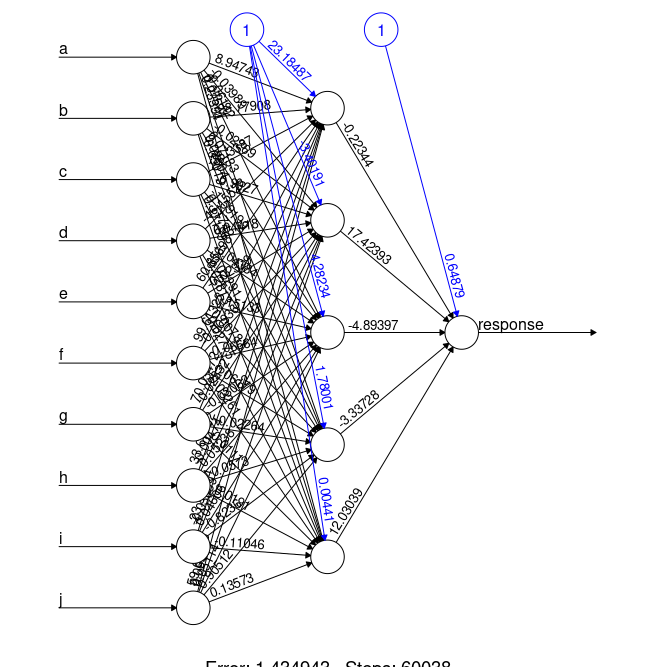

In [97]:
# Now test
cor.test(compute(model, data[-training,1:10])$net.result[,1],
         data$response[-training])


	Pearson's product-moment correlation

data:  compute(model, data[-training, 1:10])$net.result[, 1] and data$response[-training]
t = 43.969, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9375660 0.9638024
sample estimates:
      cor 
0.9524176 


It's done quite well! With a high $r^2$ despite the actual output being extremely confusing. Despite a good performance, we can't really tell what's going on by looking at the coefficients of the model (weights)
- We've actually fitted so many coefficients that it's not even clear whether this is a very good model (a parsimoninous model)

In instances like this, useful to use a **Garson test**: capable of figuring out what the most important explanatory variables are in a given model:

rel_imp   
a 0.09453343
b 0.02694495
c 0.35984264
d 0.04516685
e 0.08053081
f 0.06964602
g 0.02695663
h 0.03341600
i 0.14127444
j 0.12168822

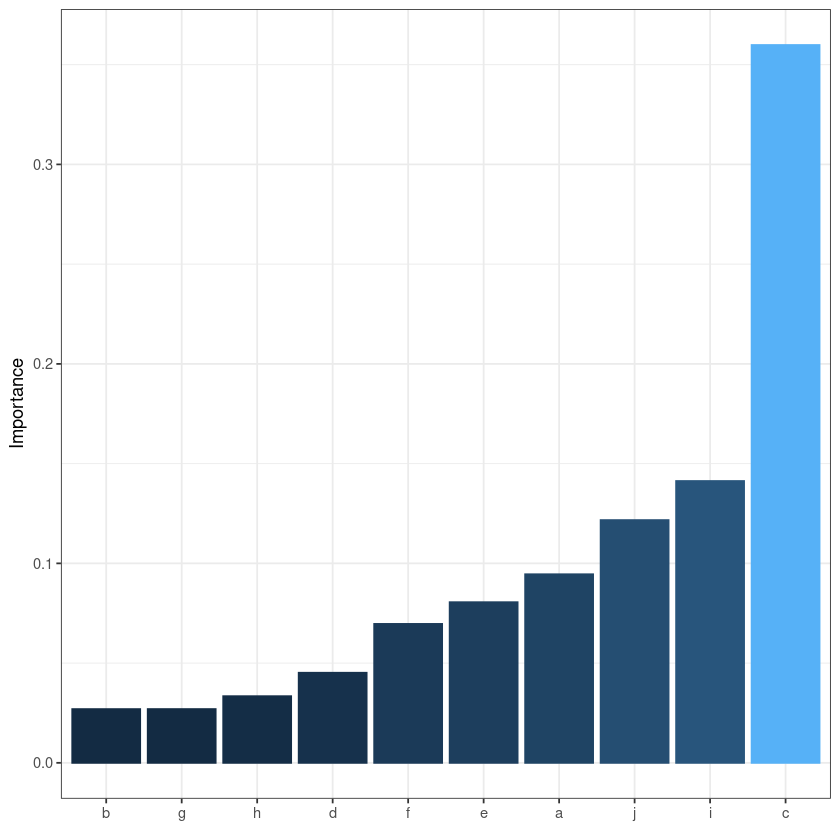

In [101]:
# Garson test
library(NeuralNetTools)
garson(model, bar_plot=FALSE)
garson(model)

Plot shows us overwhelming influence of c on model. Works by summing up the absolute magnitude of all the weights that connect explanatory variables to the response variables.
- Garson test extremely useful for seeing the influence of variables, however it only works for certain kinds of nueral networks. 
- Also unhelpfully, it doesn't say whether a given variable is positively or negatively associated, only what influence it has.

- Without seeding, can get quite different weights each time. Lots of different weights can give you essentially similar outputs (unstable)
    - two neural networks can function in exactly the same way, but with many different weights. Because so many different coefficients in place (61) and they are all interdependent. 
- can use a garson test to summarise absolute values of the weights in each node to see relative importance of explanatory variables

## Deep Learning and TensorFlow
Tensor flow is a more advanced and flexible software package for model-fitting. It is so fast because it views the world as a series of *tensors*.
- Just as a scalar functions like a speed (a unit with no direction), and a vector is a scalar with a direction (unit with one direction). A tensor is the generalisation of these two (a unit with many directions).
- Thus a tensor of rank 0 is the same as a scalar, it's a magnitude with no direction, where rank determines the number of directions a tensor has. 

A tensor is a way of describing how a system will be transformed: a tensor will take any kind of input data and move them according to its magnitude and direction.
- Let's say you have two colums of data, ($x,y$) of value ($1,1$).
- A given tensor will transform that data by moving it as far it's magnitude and in whatever direction it specifies. 
- Such tensor is likely a vector all along: ($1, 3$)- the same thing as a vector that says "go up one unit along x, and 3 units along y.

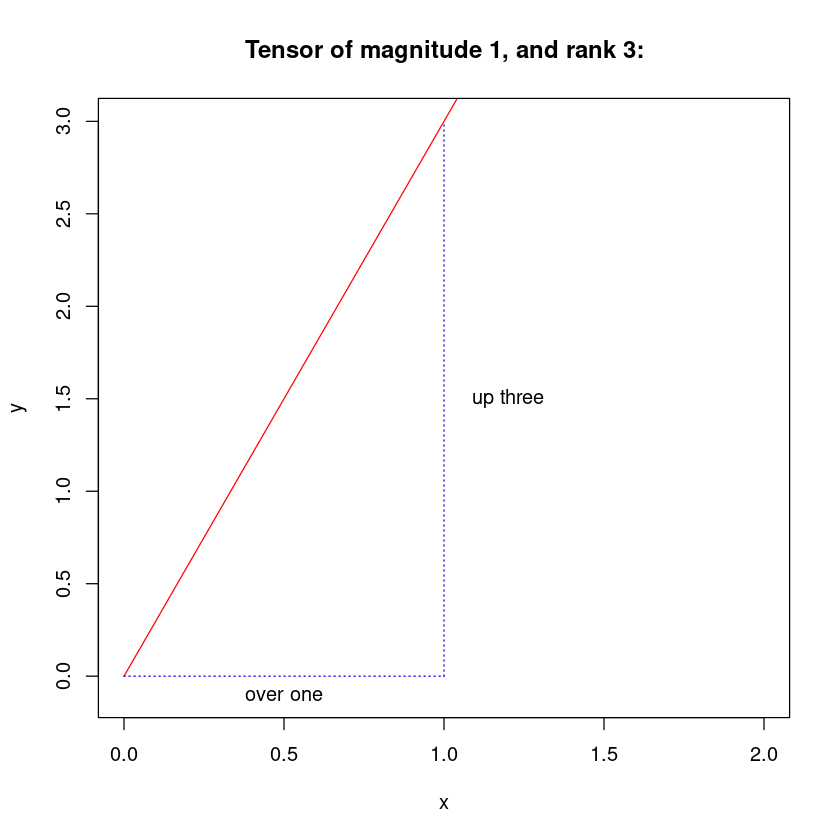

In [164]:
x <- c(0, 1, 2, 3, 4, 5)
y <- x*3
plot(y~x, type="l", col="red", xlim=c(0, 2), ylim=c(-0.1, 3),
    main = "Tensor of magnitude 1, and rank 3:")
lines(c(0,1), c(0, 0), lty = 3, col ="blue")
text(x=0.5, y=-0.1, "over one")
lines(c(1,1), c(0, 3), col="blue", lty=3)
text(x=1.2, y=1.5, "up three")

Tensors give us a formal definition of how transformations of data can take place. Lay foundations for more complicated transformations- ex: combinations of multiple transformations (tensors), see if there is redundant information in transformations (reduce the rank of a tensor via contraction), and model very complicated thing.

**TensorFlow** views the entire world in a series of tensors. Tensors are written in mathematics as tables which specify the magnitude and direction of tensors. 
- To TensorFlow, there is no fundamental difference between data and calculation- everything is just a table. 
- Allows you to rapidly calculate the output of a neural network by simply multiplying all the tensors together. 
    - Also means the dimensinality of everything you load into it is extremely important- it's trying to create appropriately-dimensioned tensors to handle all information. 

In [168]:
# Going to do same model but this time adding noise, to make it trickier for TensorFlow
exp <- replicate(10, rnorm(400))


resp <- exp[,1]*2 -0.5*exp[,2] - exp[,7]*exp[,8] + exp(abs(exp[,3]))
resp <- resp + rnorm(nrow(exp)) # add noise to the data!

exp <- as.matrix(scale(exp)); rep <- as.numeric(scale(resp))
training <- sample(nrow(exp), nrow(exp)/2)

To use Tensor flow, going to use a high-level wrapper called *Keras*- essentially the ggplot2 of the artificial neural network world

*code* (not supported by jupyter notebook)
    library(keras)
    install_keras()

1) make the model: we are using a *sequential* model: all data flows in and out in one direction:

        model <- keras_model_sequential()

2) Specify the structure of the model by using R's pipeline operator to say what happens to the data in what order: below creates a model with two hidden layers of 15 nodes each and one output layer of one node (one single response variable)
- The first hidden layer specifies that it takes on inputs of shape 10- 10 explanatory variables
- Because of how it works, Tensaflow can take sometime to initially compile its models, but once it does, it can make predictions and fit blisteringly fast.

        model %>%
            layer_dense(units=15, activation="relu", input_shape=10) %>%
            layer_dense(units=15, activation="relu") %>%
            layer_dense(units=1)

3) Compile the model
- At this stage, our model needs a definition of error so it can propogate error back into the network. Since TesnorFlow is much more sophisticated and flexible than the previous R package we were using, there's a lot more we need to specify.
- Here specifying loss of predictive power by Mean Sum of Squared error
- Also asks TensorFlow to use a built-in optimizer function (though you could write your own)
- Lastly, we ask it to report and record metrics on its fitting training
    
        model %>% compile(
        loss= "mean_squared_error", 
        optimizer = optimizer_rmsprop(), 
        metric=c("mean_squared_error")
        )

4) train the model
- Fit model to the data with specified number of training iterations (*epochs*). Here we are using 500 training iterations. 
           model %>% fit(exp[training,], resp[training], epoch=500)
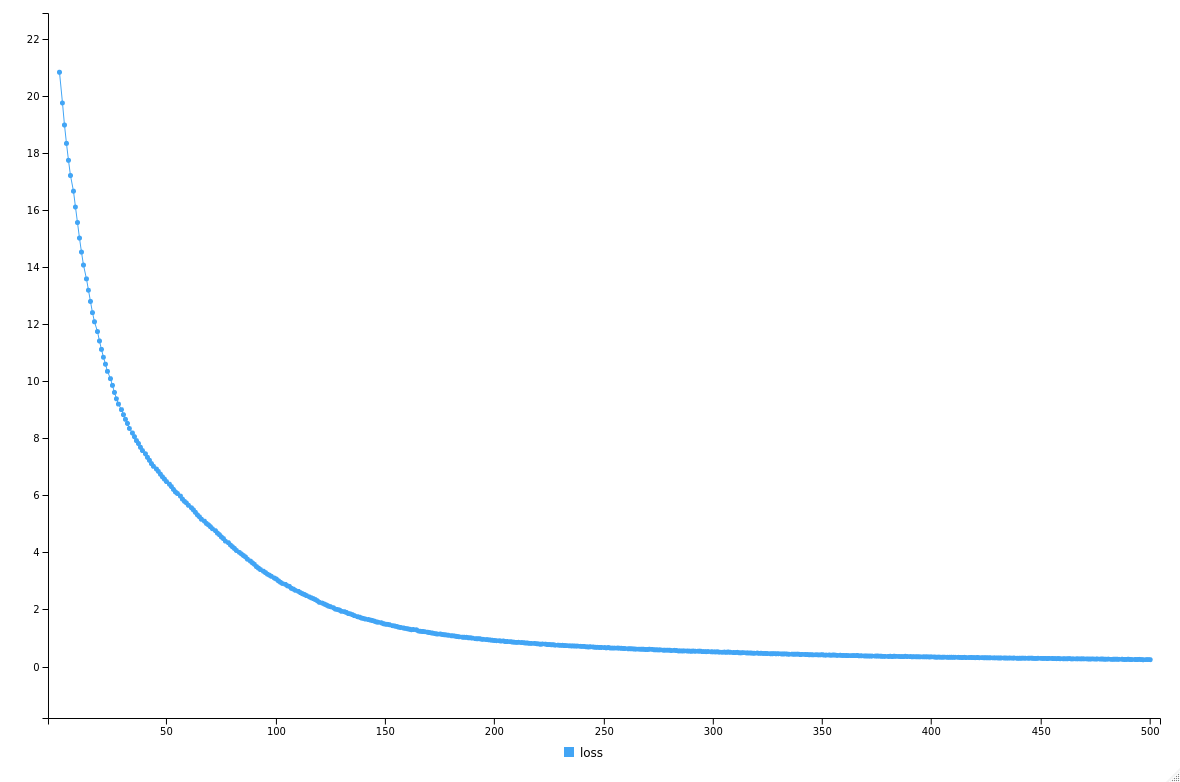
- Model runs over 500 epoches, reweighting to find least amount loss (minimising mean squared error)

5) lastly, we can validate the model with independent test data

           plot(predict(model, exp[-training,],[,1]~resp[-training])
           cor.test(predict(model,exp[-training,])[,1],resp[-training])

Gives us an $r^2$ of 0.8619495, which is brilliant!

### Activation Functions
TensorFlow offers a variety of functions, a.k.a. the special sauce of networks. 

**Linear** "The identity function"- what you get in is exactly what you get out. 
- Generally only useful for multiple regression (an extension of linear regression where you want to predict the value of a variable on the basis of two or more explanatory variables). If you need to use this, worthwhile asking if you need to be using TensorFlow at all. 

**softmax**: A generalisation of the logistic function to deal with high-dimensional data. Takes multiple inputs and rescales them between 0-1.
- Does this by taking the exponent of its input varibales and dividing them by the sum of the exponents
- Useful for predicting whether an input is one of a number of things (cute kitten, very cute kitten, extremely cute kitten), since it will return what you can treat as predicted probabilities of each of those

**Relu**: The *rectifier* function: if the output is greater than zero it will return the output unchanged, otherwise it will output a zero. 
- Has become a default activation function for many neural networks since models that use it are generally easier to train and oft have better performance. 
- Different variants such as "smooth" variant $log(1+e^x))$ and leaky variances (if x>0 then x, otherwise 0.01x) etc. 
    - Small differences amoung families will make a big difference, so best to find what is recommended for the problem, or just experiment and see what happens :) 

### Loss functions

**Mean absolute error**: Finds absolute error which isn't easily available to standard statistics, though not great for mapping things onto Normal Distributions. 

**logcosh** log(cosh(error))- the same as mean squared error but less effected by outliers (because of log). Much more helpful than you might think because if you knew what your outliers were ahead of time, you might not use an aritifical neural network. 

**kullback leibler divergence**: Basically used to get something like a likelihood. 

**Poisson** Can essentially fit any GLM in TensorFlow

**categorical_crossentropy** Useful for categorical models. Works on $-\Sigma p_i$ where $p_i$ is the probability ascribed to the correct label in your dataset. 
- if you had ten data-points and your model estimated a prob of 1 that each was the correct image, your cross-entropy would be the lowest possible value (-10) (least unpredictable, ie. fully predictable)

### Callbacks
Lastly, while training you can tell Keras to stroe log-files to visualise the process later!
- Saves a set of fancy diagnostics on your computer 

In [2]:
model %>% fit(
exp[training,], resp[training], epoch=500,
callbacks = callback_tensorboard("folder/on/your/computer")
)

tensorboard("folder/on/your/computer")

ERROR: Error in model %>% fit(exp[training, ], resp[training], epoch = 500, callbacks = callback_tensorboard("folder/on/your/computer")): could not find function "%>%"


# 04 Convolutional Neural Networks
How we can fit new structures to neural networks to create truly amazing functionalities (better than things we could just do with linear models). 
- feature detectors + edge detectors in brain inspired the convolutional neural network
    - In brain you have some features that just look for movement, some that look for edges only etc. All sorts of detectors that look for all sorts of patterns. Inspired image identification AI- by having a series of detecting networks. 
    
**Convolution** is the *sequential application* of function:
$$
f*g=f(x)*g(-x)
$$

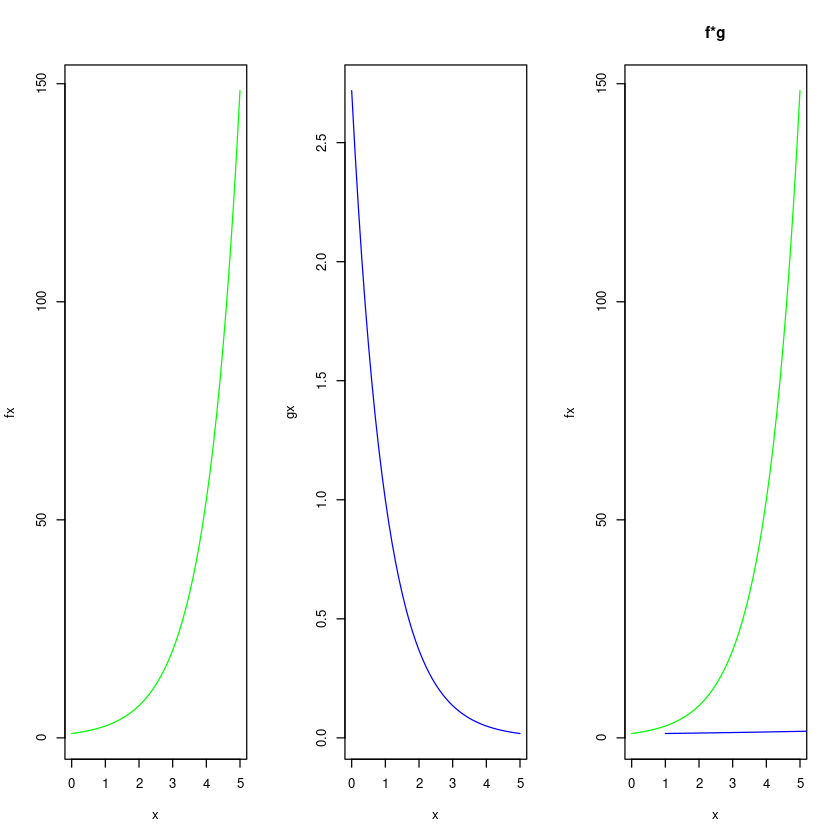

In [29]:
x <- seq(0, 5, 0.1)
fx <- exp(x)
gx <- exp(-x + 1)
gx_flip <- exp(x)
par(mfrow=c(1,3))
plot(x,fx, type="l", col="green")
plot(x, gx, type="l", col="blue", xlim=)
plot(x, fx, type="l", main="f*g", col = "green")
lines(gx_flip, col="blue")

CNN are extremely powerful tools, and have advantage of pre-processing of images on our behalf. So with suff well-designed networks, you can simply whack your images into the modle and the model will down-scale and clean them for you. 

### Basic image classification 
Non-convolutional. Start with a built-in dataset in Keras- download and clear up the demonstration data (need to do in an R script since jupyter notebook doesn't support it.)
1) Define a sequential model with the following structure: 
- begin with a *flattening* layer: a processing layer that takes two dimensions of data (the images) and flattens them into a one-dimensional vector (so as to operate on it the same as before- essentially a vector of explanatory variables)
    - Involves throwing away a lot of relational data, turning it into $28^2$ explanatory variables.
- next we define a hidden layer using *relu*, and add a *drop out* layer, which randomely drops nodes from the network during each training epoch
    - The dropout layer will have a defined "rate" or fraction of connections that will randomely be dropped between each node. While the fraction remains constant, each epoch new connections are randomely dropped. This functions to both increase processing speed and make the model more robust as it is exposed to greater variation in each epoch. 
    - After training, all the nodes are brought back into the network but each node's "downstream" connection weights are multiplied by the fraction of times the node was included in network training. 
- Last hiden layer uses softmax- good for categorical data. 
2) For compiling the model, we use adam optmiser- just good at estimating local curviture and limits on how far it can go. Lastly using "sparse_categorical_entropy"- since good for categorical data. 

Run the model on test data  and can get a confusion matrix- does alright for itself.

In [20]:
load("confusion.RDA")
confusion

   test.resp
      0   1   2   3   4   5   6   7   8   9
  0 787   5   8  17   0   0 124   0   1   0
  1   0 955   0   5   0   0   1   0   0   0
  2   4   5 720   2  95   0  73   0   2   0
  3  39  28   7 901  35   0  35   0   2   0
  4   3   4 116  26 729   0  56   0   3   0
  5   1   0   0   0   0 958   0  37   3   5
  6 158   1 146  46 138   0 698   0  25   1
  7   0   0   0   0   0  21   0 913   3  30
  8   8   2   3   2   3   2  13   1 961   0
  9   0   0   0   1   0  19   0  49   0 964

Above confusion matrix summarises the count predictions made by the model- showing both when the model predicted correctly and incorrectly, as well as where it was most likely to be confused. 
- The columns of the matrix summarise the correct groups, while the rows are the model's predicted values. 
- Can see it does quite well. (see below where names are added to each group)

In [21]:
load("confusion2.RDA")
confusion_names

            test.resp
             Tshirt/top Trousders Pullover Dress Coat Sandal Shirt Sneaker Bag
  Tshirt/top        787         5        8    17    0      0   124       0   1
  Trousders           0       955        0     5    0      0     1       0   0
  Pullover            4         5      720     2   95      0    73       0   2
  Dress              39        28        7   901   35      0    35       0   2
  Coat                3         4      116    26  729      0    56       0   3
  Sandal              1         0        0     0    0    958     0      37   3
  Shirt             158         1      146    46  138      0   698       0  25
  Sneaker             0         0        0     0    0     21     0     913   3
  Bag                 8         2        3     2    3      2    13       1 961
  Ankle boot          0         0        0     1    0     19     0      49   0
            test.resp
             Ankle boot
  Tshirt/top          0
  Trousders           0
  Pullover     

Ex: fit non-convolutional image model
**Model Structure**: 
- Define input shape in terms of pixels. *layer_flatten*: compresses into one dimensional object. Ie. turns a 28x28 image into something flat. This throws away loads of data, turning it into $28^2$ "explanatory variables". (not convolution yet)
- in hidden layers, use "softmax"- good for categorical. 
- in compiling, we are using crossentropy loss function for categorical data. Lastly optimiser "adam"- good at estimating local curvature of space it's optimising, ie. direction of travel + limits of how far it can look ahead. 
- Gives our confusion matrix- even without using a convlutional neural network, it has still done a good enough job of finding "pants". 


Now doing the same with a CNN: find it runs much faster. 
**Model structure**
- 2dimensional conv latyer: input shape= c(28,28,1): 28x 28 pixels with colours 1. "filters" compresses the image into only 20- only looking at 20 snapshots of the image
- 2d-pooling layer: pools all image important information in and allows the model to train with it
    - one key feature in these models is throwing away information- getting rid of enough information
- then we flatten and average by 2x2 grids. and go into our hidden layers. 
- Our model starts off where the flattened model ended (85% accuracy)- hits 95% accuracy
    - Models throws away info but allows neural net to learn and choose what info is most important to retain- these do the best. 
        - In fact, finds when we make it shitter, it gets better. Counterintuitive but powerful feature of the neural network. 
    


# Recurrent Neural Networks
*Turing complete* - Is able to complete anything a turing computer can. 
Amazing because they feedback on themselves. Still sequential neural nets, but feedback on themselves, giving them almost a concept of "memory".

**Model Fitting**
- first order autocorrelation = how well value correlated to value one step back. "auto"- correlated to itself, first order-by one step back. 
1) simulate a time series using first order autocorrelation 
2) add a simple rnn layer with same units as hidden layer- 5 units to recurse backward. 

- Most important bit again is recognising the *dimensionality* of the data (know that dimensions are wrong when the error messages are basically unintelligble) 

*One problem* grounded in propogated numbers through a network: exploding and vanishing gradient problems!
- multplying numbers over and over again- huge risk of exploding gradients
Solution: Invent a new kind of node- *long short-term memory*: 
- a special kind of node that has a current state, and recieves one of four commands about what to do with it.
    - input (add some input to state)
    - forget (forget state- return to default state)
    - output (output state value)
    - new cell state (take on new cell value)
- through these commands, these cells make it so only some things reoccur/it only reoccures sometimes. 

- These gates have concept of a memory. Instead of just recurring blindly, all explanatory inputs feed into a LSTM gate which remembers. 
    - So instead of constantly reoccuring, sends all values to one node which holds them in a state, and can do various commands with it. 
    - in language learning, this allows us to see what's going on. For example, in the "will loves/loved/liked wordle" example, it might store the noun "will"- the reoccurent subject of the sentence. 
        - a new subject is introduced, the LSTM forgets, and might take on a new cell state. 
        
        
- Commands are executed based on a command threshold- when enough inputs give that commands. This threshold is trained along with the weights. 

Most important thing about these artificial neural networks: let them learn and throw away information themselves.

Why are they so powerful? Return to PCA where we look for the major factor that explains most variation in the data, and the PCA2 that absorbs the variance. 
- PCA in a neural netowrk